<a href="https://colab.research.google.com/github/zhanna-naumenko/Final-project-Game-On-/blob/main/Game_On.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
!pip install kaggle

# Upload kaggle.json file (Run this cell and select your kaggle.json file through the file picker)
from google.colab import files
uploaded = files.upload()

# Make directory named kaggle and copy kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [4]:
# Download the dataset from the kaggle
!kaggle datasets download -d skateddu/metacritic-all-time-games-stats

Dataset URL: https://www.kaggle.com/datasets/skateddu/metacritic-all-time-games-stats
License(s): unknown
  0% 0.00/2.29M [00:00<?, ?B/s]
100% 2.29M/2.29M [00:00<00:00, 127MB/s]


In [5]:
# Unzip files
!unzip metacritic-all-time-games-stats.zip

Archive:  metacritic-all-time-games-stats.zip
  inflating: metacritic_games.csv    
  inflating: metacritic_games.json   


In [6]:
games_data = pd.read_csv('metacritic_games.csv')
games_data.head()

,name,platform,developer,publisher,genre(s),players,rating,attribute,release_date,link,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
0,Command & Conquer,PC,Westwood Studios,Virgin Interactive,Sci-Fi,1-4,T,NaN,"Aug 31, 1995",/game/pc/command-conquer,5,0,0,94,47,0,1,8.9
1,Full Throttle,PC,LucasArts,LucasArts,Adventure,NaN,NaN,NaN,"Apr 30, 1995",/game/pc/full-throttle,6,2,0,86,18,1,0,8.7
2,Battle Arena Toshinden,PS,Tamsoft,SCEA,Action,1-2,T,NaN,"Sep 9, 1995",/game/playstation/battle-arena-toshinden,1,3,0,69,1,0,1,5.8
3,Sid Meier's Civilization II,PC,MPS Labs,MicroProse,Strategy,1 Player,K-A,NaN,"Feb 29, 1996",/game/pc/sid-meiers-civilization-ii,7,0,0,94,46,0,1,8.9
4,Quake,PC,id Software,id Software,Action,1-16,M,NaN,"Jun 22, 1996",/game/pc/quake,9,0,0,94,84,4,1,8.8


In [7]:
# Checking the shape of the dataset, number ofrows and columns
games_data.shape

(20422, 18)

**name**: The name of the video game.

**platform**: The gaming platform on which the game is available (e.g., PlayStation, Xbox, PC).

**developer**: The company or individual who developed the game.

**publisher**: The company that published the game, responsible for its distribution and marketing.

**genre(s)**: The genre or categories of the game, such as Action, Puzzle, Role-Playing, etc.

**players**: The number of players supported by the game, indicating whether it's a single-player or multiplayer game.

**rating**: The age and content rating given to the game by rating boards (e.g., ESRCA, PEGI).

**release_date**: The date when the game was released.

**critic_positive**: The number of positive reviews the game received from critics.

**critic_neutral**: The number of neutral reviews the game received from critics.

**critic_negative**: The number of negative reviews the game received from critics.

**metascore**: A weighted average of critic review scores, on a scale of 0 to 100.

**user_positive**: The number of positive reviews the game received from users.

**user_neutral**: The number of neutral reviews the game received from users.

**user_negative**: The number of negative reviews the game received from users.

**user_score**: An average score given by users, often scaled similar to the metascore.

In [8]:
# Checking the info about dataset
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20422 entries, 0 to 20421
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             20422 non-null  object
 1   platform         20422 non-null  object
 2   developer        20385 non-null  object
 3   publisher        20416 non-null  object
 4   genre(s)         20422 non-null  object
 5   players          13193 non-null  object
 6   rating           18131 non-null  object
 7   attribute        324 non-null    object
 8   release_date     20422 non-null  object
 9   link             20422 non-null  object
 10  critic_positive  20422 non-null  int64 
 11  critic_neutral   20422 non-null  int64 
 12  critic_negative  20422 non-null  int64 
 13  metascore        20422 non-null  int64 
 14  user_positive    20422 non-null  int64 
 15  user_neutral     20422 non-null  int64 
 16  user_negative    20422 non-null  int64 
 17  user_score       20422 non-null

In [91]:
games_data['name'].nunique()

13246

In [9]:
# Function to clean the 'Name' column
def clean_name(name):
    # Remove inappropriate symbols using regular expressions
    cleaned_name = re.sub(r'[^\w\s]', '', name)
    return cleaned_name

# Apply the clean_name function to the 'Name' column
games_data['name'] = games_data['name'].apply(clean_name)

In [10]:
games_data['name'].nunique()

13202

As we are interesting till what date our data set, we need to check it. We need change the data type in the column release_date to datetime and check the max.

In [11]:
# Transforming the column 'release_date' to datetime type
games_data['release_date'] = pd.to_datetime(games_data['release_date'])

In [13]:
games_data['release_date'].max()

Timestamp('2018-12-27 00:00:00')

Since the last date is December 27, 2018, it was decided to make web scraping the information from 2019 till 2024 years from website https://www.metacritic.com/. And then combine the two datasets.

In [14]:
# Downloading the new scraped dataset
games_data2024 = pd.read_excel("games_data_2019-2024.xlsx")
games_data2024.head()

,name,platform,developer,publisher,genre(s),release_date,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
0,Inscryption,PC,Daniel Mullins Games,Devolver Digital,Card Battle,2021-10-19,46,3,0,85,401,61,23,8.6
1,Inscryption,PlayStation 5,Daniel Mullins Games,Devolver Digital,Card Battle,2021-10-19,7,0,0,87,79,7,14,8.0
2,Inscryption,PlayStation 4,Daniel Mullins Games,Devolver Digital,Card Battle,2021-10-19,0,0,0,0,20,3,7,7.7
3,Inscryption,Nintendo Switch,Daniel Mullins Games,Devolver Digital,Card Battle,2021-10-19,8,0,0,87,48,3,6,8.3
4,Inscryption,Xbox One,Daniel Mullins Games,Devolver Digital,Card Battle,2021-10-19,0,0,0,0,0,0,0,0.0


In [15]:
# Transforming the column 'release_date' to datetime type
games_data2024['release_date'] = pd.to_datetime(games_data2024['release_date'])

In [16]:
# Apply the clean_name function to the 'Name' column
games_data2024['name'] = games_data2024['name'].apply(clean_name)

In [17]:
games_data.columns

Index(['name', 'platform', 'developer', 'publisher', 'genre(s)', 'players',
       'rating', 'attribute', 'release_date', 'link', 'critic_positive',
       'critic_neutral', 'critic_negative', 'metascore', 'user_positive',
       'user_neutral', 'user_negative', 'user_score'],
      dtype='object')

In [18]:
games_data2024.columns

Index(['name', 'platform', 'developer', 'publisher', 'genre(s)',
       'release_date', 'critic_positive', 'critic_neutral', 'critic_negative',
       'metascore', 'user_positive', 'user_neutral', 'user_negative',
       'user_score'],
      dtype='object')

As we need to merge two datasets we need the same names and number of columns. So, we decided to drop the columns 'players', 'rating', 'attribute' ans 'link'.

In [19]:
# Droping the columns 'attribute', 'rating', 'players' and 'link'
games_data = games_data.drop('attribute', axis=1)
games_data = games_data.drop('link', axis=1)
games_data = games_data.drop('players', axis=1)
games_data = games_data.drop('rating', axis=1)

In [20]:
# Concatenating two dataframes
games_data_full = pd.concat([games_data, games_data2024])

In [21]:
games_data_full.head()

,name,platform,developer,publisher,genre(s),release_date,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
0,Command Conquer,PC,Westwood Studios,Virgin Interactive,Sci-Fi,1995-08-31,5,0,0,94,47,0,1,8.9
1,Full Throttle,PC,LucasArts,LucasArts,Adventure,1995-04-30,6,2,0,86,18,1,0,8.7
2,Battle Arena Toshinden,PS,Tamsoft,SCEA,Action,1995-09-09,1,3,0,69,1,0,1,5.8
3,Sid Meiers Civilization II,PC,MPS Labs,MicroProse,Strategy,1996-02-29,7,0,0,94,46,0,1,8.9
4,Quake,PC,id Software,id Software,Action,1996-06-22,9,0,0,94,84,4,1,8.8


In [22]:
games_data_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27224 entries, 0 to 6801
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             27224 non-null  object        
 1   platform         27224 non-null  object        
 2   developer        27187 non-null  object        
 3   publisher        27218 non-null  object        
 4   genre(s)         27224 non-null  object        
 5   release_date     27224 non-null  datetime64[ns]
 6   critic_positive  27224 non-null  int64         
 7   critic_neutral   27224 non-null  int64         
 8   critic_negative  27224 non-null  int64         
 9   metascore        27224 non-null  int64         
 10  user_positive    27224 non-null  int64         
 11  user_neutral     27224 non-null  int64         
 12  user_negative    27224 non-null  int64         
 13  user_score       27224 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(6)
me

In [23]:
# Checking the summary of the statistics
games_data_full.describe()

,release_date,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative
count,27224,27224.000000,27224.000000,27224.000000,27224.000000,27224.000000,27224.000000,27224.000000
mean,2013-06-22 22:52:39.917719552,9.973736,6.272003,1.209117,63.291361,31.708603,6.894174,14.169520
min,1995-04-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007-11-13 00:00:00,1.000000,2.000000,0.000000,58.000000,0.000000,0.000000,0.000000
50%,2014-04-03 12:00:00,4.000000,4.000000,0.000000,70.000000,3.000000,1.000000,1.000000
75%,2018-12-21 18:00:00,12.000000,8.000000,1.000000,79.000000,12.000000,4.000000,3.000000
max,2025-05-15 00:00:00,231.000000,69.000000,51.000000,101.000000,23900.000000,3300.000000,8800.000000
std,NaN,14.947279,7.087939,2.860599,23.812892,281.268355,39.302660,166.463659


In [24]:
# Checking the duplicates
games_data.duplicated().sum()

2

In [25]:
# Finding and print the duplicates
duplicate_rows = games_data.loc[games_data.duplicated()]
print(f"Duplicate rows based on all columns:\n {duplicate_rows}")

Duplicate rows based on all columns:
           name platform developer publisher       genre(s) release_date  \
8258  Bookworm       DS    PopCap    PopCap  Miscellaneous   2009-11-30   
8260  Bookworm       DS    PopCap    PopCap  Miscellaneous   2009-11-30   

      critic_positive  critic_neutral  critic_negative  metascore  \
8258                2               4                0         80   
8260                2               4                0         71   

      user_positive  user_neutral  user_negative user_score  
8258              0             0              0        tbd  
8260              0             0              0        tbd  


In [26]:
# Finding and print all the values of duplicates
games_data[games_data["name"] == "Bookworm"]

,name,platform,developer,publisher,genre(s),release_date,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
8257,Bookworm,DS,PopCap,PopCap,Miscellaneous,2009-11-30,2,4,0,80,0,0,0,tbd
8258,Bookworm,DS,PopCap,PopCap,Miscellaneous,2009-11-30,2,4,0,80,0,0,0,tbd
8259,Bookworm,DS,PopCap,PopCap,Miscellaneous,2009-11-30,2,4,0,71,0,0,0,tbd
8260,Bookworm,DS,PopCap,PopCap,Miscellaneous,2009-11-30,2,4,0,71,0,0,0,tbd


In [27]:
# Droping the duplicates
games_data = games_data.drop_duplicates()

In [28]:
# Checking that the duplicates were removed
games_data[games_data["name"] == "Bookworm"]

,name,platform,developer,publisher,genre(s),release_date,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
8257,Bookworm,DS,PopCap,PopCap,Miscellaneous,2009-11-30,2,4,0,80,0,0,0,tbd
8259,Bookworm,DS,PopCap,PopCap,Miscellaneous,2009-11-30,2,4,0,71,0,0,0,tbd


In [29]:
# Checking the null values
games_data_full.isnull().sum()

name                0
platform            0
developer          37
publisher           6
genre(s)            0
release_date        0
critic_positive     0
critic_neutral      0
critic_negative     0
metascore           0
user_positive       0
user_neutral        0
user_negative       0
user_score          0
dtype: int64

In [30]:
#Filling null values in columns 'developer' and 'publisher' with "Other"
games_data_full['developer'] = games_data_full['developer'].fillna('Other')
games_data_full['publisher'] = games_data_full['publisher'].fillna('Other')

In [31]:
#Filling tbd values in columns 'user_score' and 'metascore' with 0
games_data_full['user_score'] = games_data_full['user_score'].replace('tbd', 0)
games_data_full['metascore'] = games_data_full['metascore'].replace('tbd', 0)

In [32]:
# Checking unique values
games_data_full['critic_positive'].unique()

array([  5,   6,   1,   7,   9,  12,  13,   8,   3,  11,   2,  21,  20,
        15,  10,   4,   0,  22,  24,  16,  19,  18,  14,  17,  30,  27,
        34,  25,  37,  32,  28,  33,  29,  26,  23,  56,  68,  42,  53,
        50,  59,  35,  43,  38,  31,  70,  62,  36,  46,  40,  60,  41,
        39,  80,  72,  45,  51,  44,  49,  55,  81,  79,  89,  76,  52,
        74,  48,  58,  63,  65,  86,  61,  77,  64,  54,  47,  82,  69,
        66,  57,  73,  88,  90,  67,  85,  83,  78,  93, 105, 100,  75,
        71,  84,  87,  98,  96, 101,  92,  99,  94,  97, 111, 106, 113,
       110, 118, 117, 103, 127, 116, 134, 108,  95, 107, 104, 163, 231,
       166, 102,  91])

In [33]:
# Checking unique values
games_data_full['critic_neutral'].unique()

array([ 0,  2,  3,  1,  4,  6,  5,  8,  7, 11,  9, 12, 14, 13, 10, 15, 17,
       16, 18, 23, 20, 21, 19, 24, 22, 25, 28, 30, 27, 38, 33, 31, 26, 29,
       37, 32, 34, 35, 36, 40, 46, 41, 53, 43, 39, 49, 50, 45, 51, 54, 48,
       44, 58, 42, 47, 60, 55, 65, 61, 56, 69, 62, 52])

In [34]:
# Checking unique values
games_data_full['critic_negative'].unique()

array([ 0,  1,  4,  2,  3,  5,  9,  7,  8, 10,  6, 15, 11, 14, 12, 21, 13,
       18, 16, 23, 19, 17, 20, 22, 25, 36, 26, 33, 30, 31, 27, 24, 38, 34,
       32, 39, 51, 28, 43])

In [35]:
# Checking unique values
games_data_full['user_positive'].unique()

array([   47,    18,     1,    46,    84,   220,     4,    15,    31,
          52,    25,    39,     5,     8,     0,     2,     6,     3,
          10,   122,   106,   365,    13,    19,   111,    37,    45,
          38,    20,    23,    61,     9,    11,   918,    48,   502,
          17,   205,    71,    93,    43,    55,   107,    79,   134,
          12,   121,    14,    63,    42,    28,    65,    16,    40,
          97,    92,    58,   141,   131,    21,    68,    41,     7,
          80,    33,   210,   202,   168,    81,    30,    44,    22,
          72,   242,    26,    29,   512,   117,    27,    49,   112,
          24,    91,    50,   195,   419,   249,   105,   116,    36,
          87,   234,   232,   118,    78,    73,    85,    35,   133,
         136,    88,    56,    67,   267,   198,    83,    51,    59,
         123,   135,    34,   203,    32,   171,   124,   289,   109,
          57,   143,   254,   110,    70,    66,    60,    76,   104,
          74,    53,

In [36]:
# Checking unique values
games_data_full['user_neutral'].unique()

array([   0,    1,    4,    8,   14,    2,    7,    3,   11,   34,    9,
          5,   12,   42,   32,   10,   18,    6,   15,   17,   23,   13,
         16,   48,   31,   19,   24,   20,   22,   40,   21,   27,  140,
         86,   81,   84,   82,   28,   29,   30,   26,   25,   50,   38,
         62,   79,   87,   35,   63,  103,   45,   36,   41,   39,   37,
         52,   46,   54,  135,  215,   43,   77,  110,  113,   83,   97,
         44,  142,  178,   51,   71,   70,  130,   89,   76,   66,   58,
        139,  126,   55,   33,   64,   95,  207,   93,  188,   78,  164,
         67,  150,  100,  146,  120,  132,   47,   57,   72,   90,   75,
        101,   68,   73,   53,  108,  324,   88,  105,  112,  192,   59,
        464,   65,  260,  131,  216,  111,  293,   98,  149,  143,  170,
         60,   61,  200,  134,  121,  336,  118,   49,  507,  196,  124,
        106,  204,  127,   85,   69,   56,  141,  303,  122,  171,  123,
         99,  173,  222,  184,  153,   80,   92,   

In [37]:
# Checking unique values
games_data_full['user_negative'].unique()

array([   1,    0,    7,   10,    3,    6,    2,    4,   15,    5,   37,
         13,   12,   11,    8,   14,    9,   18,   23,   38,   26,   25,
         16,   31,   21,   27,   46,   17,   22,  251,  110,   53,  144,
         29,   96,   55,   35,   20,   42,   28,   34,   24,   33,  622,
        621,   83,   48,   47,   67,   62,   78,   58,   41,  106,   73,
         39,   30,   19,  133,   54,   87,  184,   64,   61,   97,   80,
         76,  101,  194,   32,  192,  371,   44,   36,  149,  202,   66,
        317,  832,   68,   56,   45,   51,  379,   81,  130,   91,  139,
        103,   43,   52,  125,   57,  154,  295,   50,   89,  147,  104,
        452,  479,  270, 2546, 1275,   77,  120,  490,  117, 1021,  204,
         82,  347,  320,  465, 1179,   65,   40,   79,   60,   84,   98,
        123,  119,   69,  523,  141,  155,   88, 1037,   86, 3001,  166,
        138,   71,  390,  169,  226,  145,  146,  240,   49,   59,  171,
       1304,  150, 1675,   90,  341,   99,  450,   

In [38]:
# Checking unique values
games_data_full['user_score'].unique()

array(['8.9', '8.7', '5.8', '8.8', '9.2', '8.5', '8.2', '8.4', '9.0',
       '8.6', '5.0', '7.1', '8.0', 0, '8.1', '8.3', '7.8', '7.4', '7.5',
       '7.6', '6.8', '6.4', '9.1', '6.9', '7.2', '7.9', '6.6', '7.7',
       '6.2', '6.1', '6.3', '7.0', '7.3', '4.0', '6.7', '6.0', '6.5',
       '5.3', '5.9', '5.2', '5.6', '4.9', '3.3', '4.6', '5.7', '4.2',
       '3.6', '1.2', '0.7', '2.3', '2.8', '2.1', '5.5', '4.7', '5.1',
       '5.4', '4.5', '4.3', '3.5', '1.8', '4.4', '3.8', '3.0', '3.9',
       '3.4', '2.5', '2.6', '4.8', '1.7', '2.4', '0.4', '3.2', '3.7',
       '2.7', '1.9', '2.0', '2.9', '2.2', '3.1', '4.1', '1.4', '1.6',
       '1.0', '1.3', '1.5', '0.1', '1.1', '0.8', '9.4', '9.3', '0.5', 8.6,
       8.0, 7.7, 8.3, 8.8, 7.5, 8.4, 7.9, 6.5, 7.6, 6.9, 8.7, 8.9, 7.3,
       8.2, 5.9, 3.9, 6.8, 4.3, 8.5, 7.8, 8.1, 7.1, 6.7, 9.2, 6.6, 6.1,
       9.1, 9.6, 9.5, 5.0, 5.7, 9.0, 7.4, 7.2, 5.8, 5.5, 7.0, 6.0, 6.3,
       3.5, 5.4, 6.4, 4.2, 4.8, 4.0, 5.3, 4.1, 2.4, 2.7, 5.6, 0.8, 2.3,
    

In [39]:
# Checking unique values
games_data_full['metascore'].unique()

array([ 94,  86,  69,  93,  92,  91,  90,  89,  85,  84,  83,  80,  79,
        77,  74,  70,  59,  53,  96,  88,  82,  73,  72,  71,  56,  99,
        87,  81,  78,  76,  75,  67,  65,  61,  58,  98,  66,  60,  49,
        43,  97,  95,  68,  64,  63,  62,  57,  55,  54,  52,  51,  50,
        48,  47,  46,  44,  42,  41,  40,  39,  38,  37,  35,  34,  32,
        30,  29,  28,  27,  26,  25,  24,  45,  36,  33,  31,  22,  19,
        23,  18,   8,  16,  12,  21,  20,  17,  11,  13,  14,  15,   0,
       101])

In [40]:
# Changing the type of the column user_score
games_data_full['user_score'] = games_data_full['user_score'].astype(float)

In [41]:
games_data_full.describe()

,release_date,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
count,27224,27224.000000,27224.000000,27224.000000,27224.000000,27224.000000,27224.000000,27224.000000,27224.000000
mean,2013-06-22 22:52:39.917719552,9.973736,6.272003,1.209117,63.291361,31.708603,6.894174,14.169520,5.603050
min,1995-04-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007-11-13 00:00:00,1.000000,2.000000,0.000000,58.000000,0.000000,0.000000,0.000000,4.500000
50%,2014-04-03 12:00:00,4.000000,4.000000,0.000000,70.000000,3.000000,1.000000,1.000000,6.800000
75%,2018-12-21 18:00:00,12.000000,8.000000,1.000000,79.000000,12.000000,4.000000,3.000000,7.800000
max,2025-05-15 00:00:00,231.000000,69.000000,51.000000,101.000000,23900.000000,3300.000000,8800.000000,10.000000
std,NaN,14.947279,7.087939,2.860599,23.812892,281.268355,39.302660,166.463659,2.995555


In [42]:
# Create new columns 'year' and 'month'
games_data_full['Year'] = games_data_full['release_date'].dt.year
games_data_full['Month'] = games_data_full['release_date'].dt.month

In [43]:
# Checking unique values for column 'Year'
games_data_full['Year'].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2018, 2002, 2003, 2004,
       2005, 2017, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2021, 2022, 2023, 2020, 2024, 2019, 2025], dtype=int32)

In [44]:
# Checking unique values for column 'Month'
games_data_full['Month'].unique()

array([ 8,  4,  9,  2,  6, 12, 11,  3, 10,  1,  7,  5], dtype=int32)

In [45]:
# Map numeric month values to month names
month_mapping = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}
games_data_full['Month'] = games_data_full['Month'].map(month_mapping)

In [46]:
# Checking unique values for column 'Month'
games_data_full['Month'].unique()

array(['August', 'April', 'September', 'February', 'June', 'December',
       'November', 'March', 'October', 'January', 'July', 'May'],
      dtype=object)

In [47]:
# Checking the null values
games_data_full.isnull().sum()

name               0
platform           0
developer          0
publisher          0
genre(s)           0
release_date       0
critic_positive    0
critic_neutral     0
critic_negative    0
metascore          0
user_positive      0
user_neutral       0
user_negative      0
user_score         0
Year               0
Month              0
dtype: int64

As some of the rows have 0 scores in all 8 columns ('critic_positive', 'critic_neutral', 'critic_negative', 'metascore', 'user_positive', 'user_neutral', 'user_negative', 'user_score'), this indicates that the game is either not released yet or is not a popular console type. Therefore, we decided to drop these rows.

In [48]:
# Number of rows in the original DataFrame
original_row_count = len(games_data_full)

# Define the columns to check
columns_to_check = ['critic_positive', 'critic_neutral', 'critic_negative', 'metascore',
                    'user_positive', 'user_neutral', 'user_negative', 'user_score']

# Drop rows where all specified columns are 0
games_data_full_new = games_data_full[~(games_data_full[columns_to_check] == 0).all(axis=1)]

# Number of rows in the filtered DataFrame
filtered_row_count = len(games_data_full_new)

# Calculate the number of rows dropped
rows_dropped = original_row_count - filtered_row_count

print(f"Number of rows dropped: {rows_dropped}")

Number of rows dropped: 1740


In [49]:
# Conting the number of unique values for the column 'name'
games_data_full_new['name'].value_counts()

name
Prince of Persia The Lost Crown              12
Sea of Stars                                 12
Hitman 3                                     12
Mortal Kombat 11 Ultimate                    12
DOOM Eternal                                 12
                                             ..
Football Manager Live                         1
Mystery Case Files Dire Grove                 1
Henry Hatsworth in the Puzzling Adventure     1
Space Invaders Extreme 2                      1
Magic The Gathering  Tactics                  1
Name: count, Length: 15028, dtype: int64

In [50]:
# Showing the unique values of column 'platform'
games_data_full_new['platform'].unique()

array(['PC', 'PS', 'N64', 'DC', 'PS2', 'XBOX', 'GBA', 'GC', 'DS', 'X360',
       'PSP', 'WII', 'PS3', '3DS', 'VITA', 'WIIU', 'PS4', 'XONE',
       'Switch', 'PlayStation 5', 'PlayStation 4', 'Nintendo Switch',
       'Xbox Series X', 'Xbox One', 'Meta Quest', 'PlayStation 3',
       'PlayStation Vita', 'Wii U', 'PlayStation 6', 'PlayStation 2',
       'PlayStation 7', 'Xbox 360'], dtype=object)

**PC**: Personal Computer

**PS**: PlayStation

**N64**: Nintendo 64

**DC**: Dreamcast

**PS2**: PlayStation 2

**XBOX**: Xbox

**GBA**: Game Boy Advance

**GC**: GameCube

**DS**: Nintendo DS

**X360**: Xbox 360

**PSP**: PlayStation Portable

**WII**: Nintendo Wii

**PS3**: PlayStation 3

**3DS**: Nintendo 3DS

**VITA**: PlayStation Vita

**WIIU**: Nintendo Wii U

**PS4**: PlayStation 4

**XONE**: Xbox One

**Switch**: Nintendo Switch

**PlayStation 5**: PlayStation 5

**PlayStation 4**: PlayStation 4

**Nintendo Switch**: Nintendo Switch

**Xbox Series X**: Xbox Series X

**Xbox One**: Xbox One

**PlayStation Vita**: PlayStation Vita

**Wii U**: Nintendo Wii U

**Meta Quest**: Meta Quest

**PlayStation 3**: PlayStation 3

**PlayStation 6**: PlayStation 6

**PlayStation 2**: PlayStation 2

**PlayStation 7**: PlayStation 7

**Xbox 360**: Xbox 360

**Wii**: Nintendo Wii


In [51]:
# Making another column to determine the name of the platform brand
# Dictionary to map platform abbreviations to categories
platform_mapping = {
    'PC': 'Computer',
    'PS': 'PlayStation',
    'PS2': 'PlayStation',
    'PS3': 'PlayStation',
    'PS4': 'PlayStation',
    'PSP': 'PlayStation',
    'VITA': 'PlayStation',
    'PlayStation 5': 'PlayStation',
    'PlayStation 4': 'PlayStation',
    'PlayStation 3': 'PlayStation',
    'PlayStation 6': 'PlayStation',
    'PlayStation 7': 'PlayStation',
    'N64': 'Nintendo',
    'GBA': 'Nintendo',
    'GC': 'Nintendo',
    'DS': 'Nintendo',
    '3DS': 'Nintendo',
    'WII': 'Nintendo',
    'Wii': 'Nintendo',
    'WIIU': 'Nintendo',
    'Wii U': 'Nintendo',
    'Switch': 'Nintendo',
    'Nintendo Switch': 'Nintendo',
    'DC': 'Sega',
    'XBOX': 'Xbox',
    'X360': 'Xbox',
    'XONE': 'Xbox',
    'Xbox One': 'Xbox',
    'Xbox Series X': 'Xbox',
    'Xbox 360': 'Xbox',
    'Meta Quest': 'Meta'
}

# Create a new column 'platform_category' using the mapping
games_data_full_new['platform_brand'] = games_data_full_new['platform'].map(platform_mapping)

<ipython-input-51-871952a75efd>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_data_full_new['platform_brand'] = games_data_full_new['platform'].map(platform_mapping)


In [52]:
games_data_full_new.head()

,name,platform,developer,publisher,genre(s),release_date,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score,Year,Month,platform_brand
0,Command Conquer,PC,Westwood Studios,Virgin Interactive,Sci-Fi,1995-08-31,5,0,0,94,47,0,1,8.9,1995,August,Computer
1,Full Throttle,PC,LucasArts,LucasArts,Adventure,1995-04-30,6,2,0,86,18,1,0,8.7,1995,April,Computer
2,Battle Arena Toshinden,PS,Tamsoft,SCEA,Action,1995-09-09,1,3,0,69,1,0,1,5.8,1995,September,PlayStation
3,Sid Meiers Civilization II,PC,MPS Labs,MicroProse,Strategy,1996-02-29,7,0,0,94,46,0,1,8.9,1996,February,Computer
4,Quake,PC,id Software,id Software,Action,1996-06-22,9,0,0,94,84,4,1,8.8,1996,June,Computer


In [53]:
# Checking the values in column developer
games_data_full_new['developer'].value_counts()

developer
Capcom                    351
Telltale Games            299
Konami                    225
EA Sports                 207
EA Canada                 197
                         ... 
1C Game Studios             1
Investigate North Aps       1
Schulenburg Software        1
Level 5, Brownie Brown      1
Alterego Games              1
Name: count, Length: 5489, dtype: int64

In [54]:
# Checking the values in column publisher
games_data_full_new['publisher'].value_counts()

publisher
Ubisoft                     996
Electronic Arts             883
Activision                  830
Sega                        729
Nintendo                    653
                           ... 
Neptune Interactive Inc.      1
ZackBellGames                 1
Office Create                 1
Shark Punch                   1
StickyLock Studios            1
Name: count, Length: 2607, dtype: int64

In [55]:
# Checking the values in column genre(s)
games_data_full_new['genre(s)'].value_counts()

genre(s)
Action              7137
Action Adventure    2633
Sports              1847
Role-Playing        1790
Strategy            1675
                    ... 
WWII                   1
Formula One            1
Olympic Sports         1
Board Games            1
Bowling                1
Name: count, Length: 154, dtype: int64

In [56]:
# Unique values in categorical columns
unique_values = {col: games_data_full_new[col].nunique() for col in ['platform', 'developer', 'publisher', 'genre(s)']}
print("Unique values in categorical columns:\n", unique_values)

Unique values in categorical columns:
 {'platform': 32, 'developer': 5489, 'publisher': 2607, 'genre(s)': 154}


In [57]:
# Function to calculate outliers using IQR method
def calculate_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers


Metascore Outliers:
579     32
580     30
581     29
582     28
583     27
        ..
6759     0
6773     0
6778     0
6791     0
6795     0
Name: metascore, Length: 1144, dtype: int64

User Score Outliers:
19      0.0
27      0.0
95      0.0
106     0.0
140     0.0
       ... 
6777    0.0
6779    1.4
6797    0.0
6800    1.8
6801    1.7
Name: user_score, Length: 3547, dtype: float64


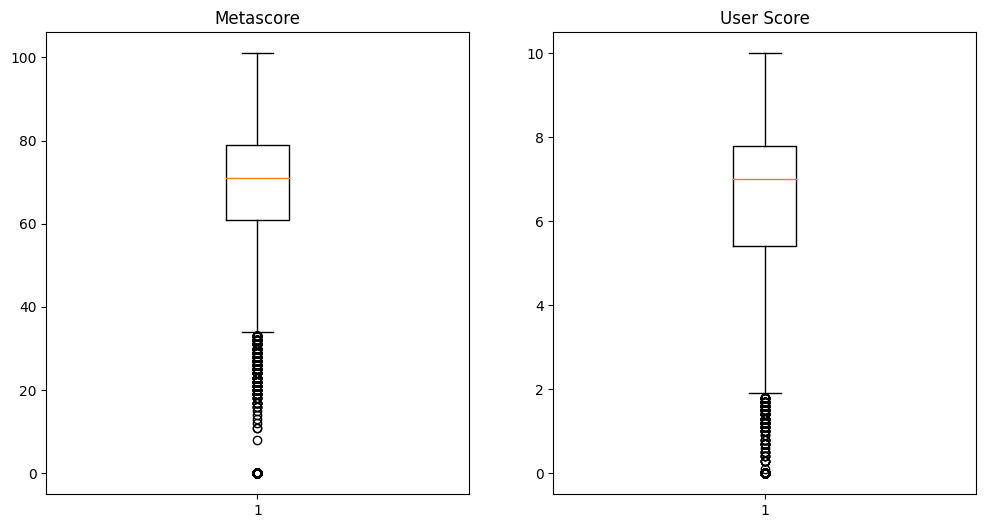

In [58]:
# Calculate outliers for metascore and user_score
metascore_outliers = calculate_outliers(games_data_full_new['metascore'])
user_score_outliers = calculate_outliers(games_data_full_new['user_score'])
print("\nMetascore Outliers:")
print(metascore_outliers)

print("\nUser Score Outliers:")
print(user_score_outliers)

# Visualize the outliers using box plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(games_data_full_new['metascore'])
plt.title('Metascore')

plt.subplot(1, 2, 2)
plt.boxplot(games_data_full_new['user_score'])
plt.title('User Score')

plt.show()

As the score for metascore and user score starting from 0, there is no outliers.

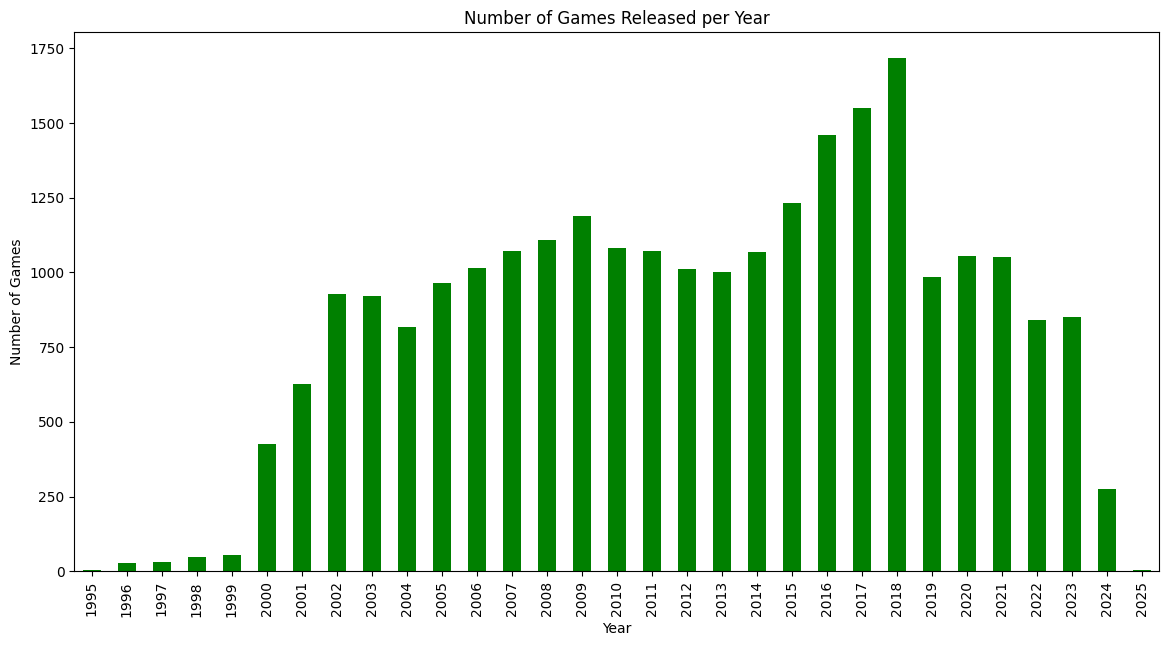

In [59]:
# Number of games released per year
games_per_year = games_data_full_new['Year'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
games_per_year.plot(kind='bar', color='g')
plt.title('Number of Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

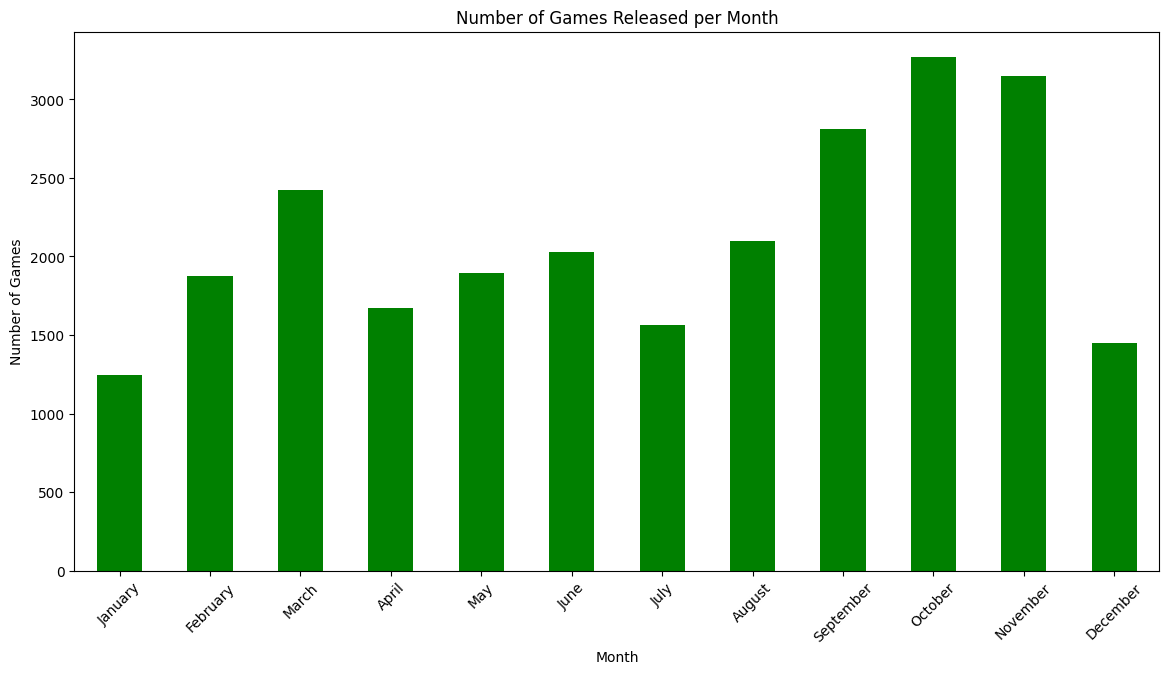

In [60]:
# Months Order
months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Calculate the number of games released per month
games_per_month = games_data_full_new['Month'].value_counts().reindex(months_order)

# Plot the data
plt.figure(figsize=(14, 7))
games_per_month.plot(kind='bar', color='g')
plt.title('Number of Games Released per Month')
plt.xlabel('Month')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

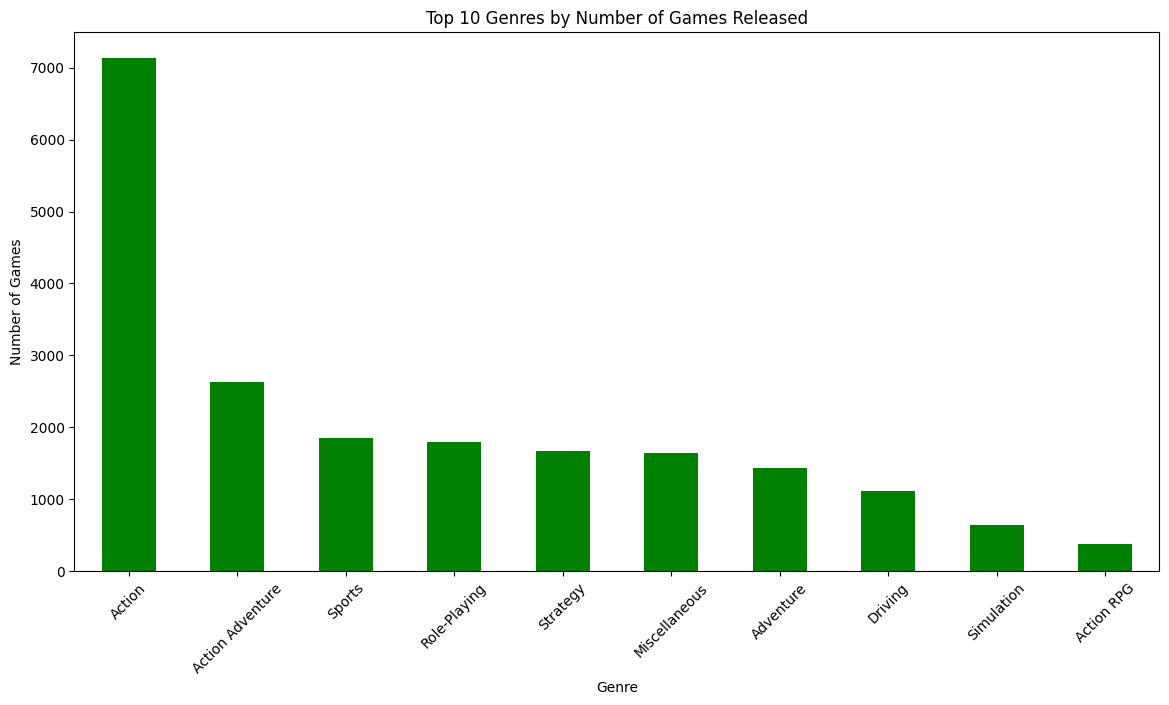

In [61]:
# Number of games released by genres
top_10_ganres = games_data_full_new['genre(s)'].value_counts().nlargest(10)

plt.figure(figsize=(14, 7))
top_10_ganres.plot(kind='bar', color='g')
plt.title('Top 10 Genres by Number of Games Released')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

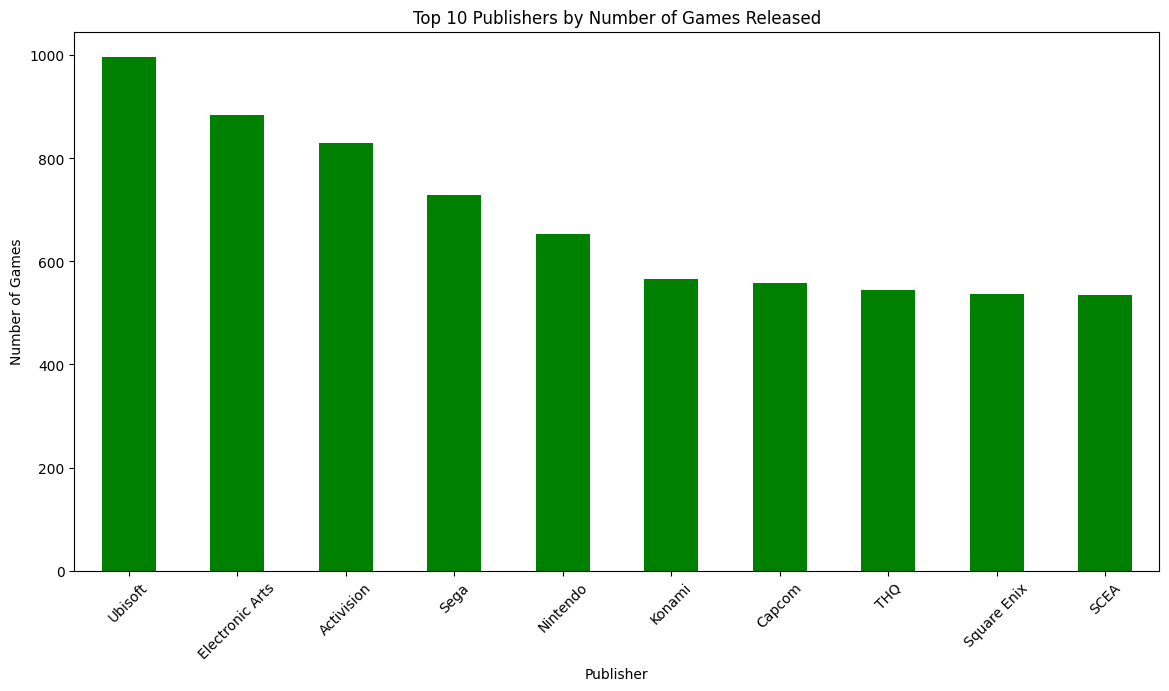

In [62]:
# Number of games released by publisher
top_10_publishers = games_data_full_new['publisher'].value_counts().nlargest(10)

plt.figure(figsize=(14, 7))
top_10_publishers.plot(kind='bar', color='g')
plt.title('Top 10 Publishers by Number of Games Released')
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

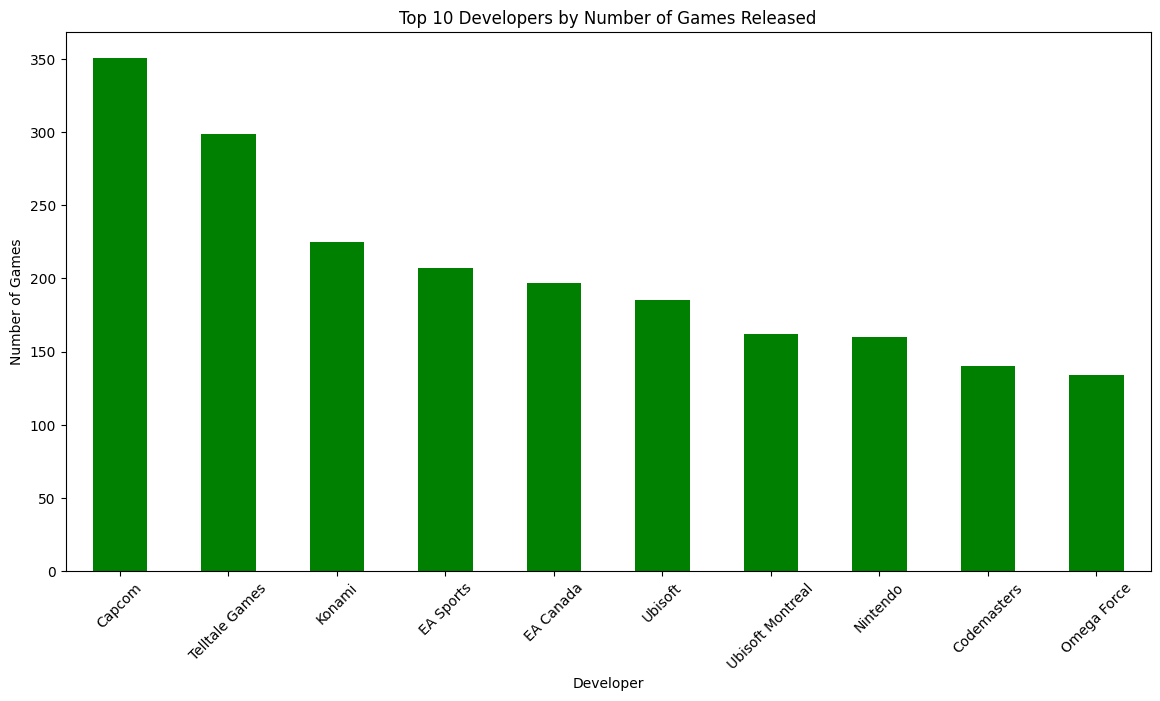

In [63]:
# Number of games released by developer
top_10_developer = games_data_full_new['developer'].value_counts().nlargest(10)

plt.figure(figsize=(14, 7))
top_10_developer.plot(kind='bar', color='g')
plt.title('Top 10 Developers by Number of Games Released')
plt.xlabel('Developer')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

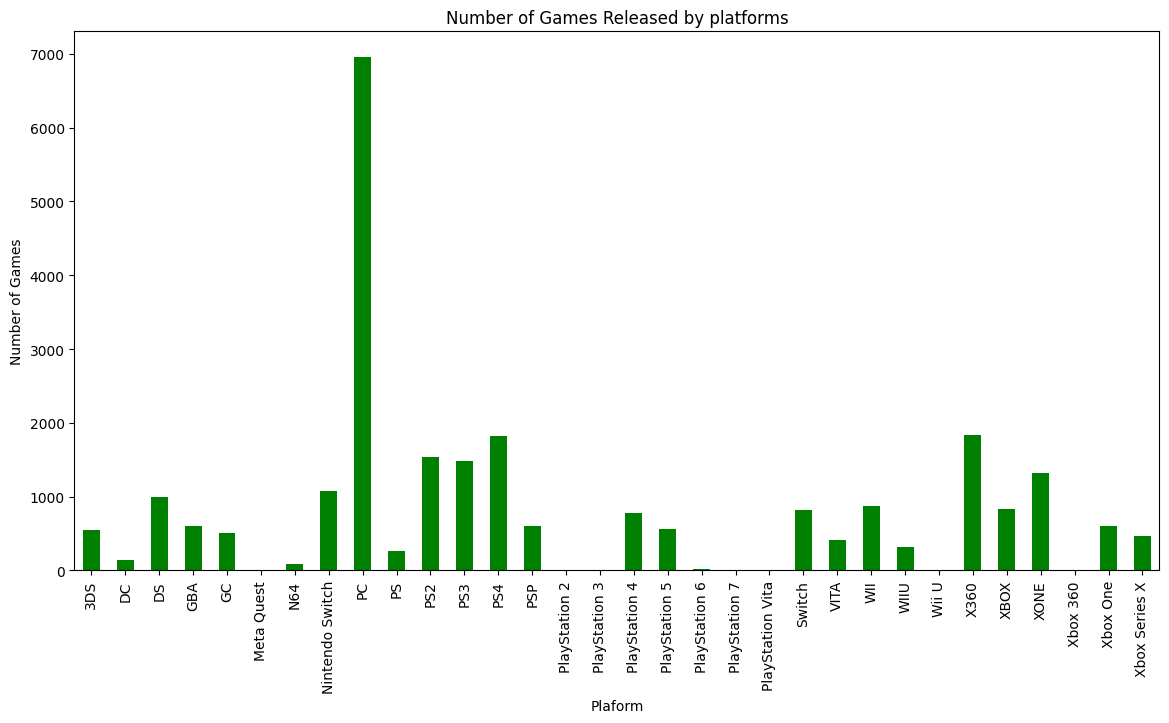

In [64]:
# Number of games released by platforms

games_per_year = games_data_full_new['platform'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
games_per_year.plot(kind='bar', color='g')
plt.title('Number of Games Released by platforms')
plt.xlabel('Plaform')
plt.ylabel('Number of Games')
plt.show()

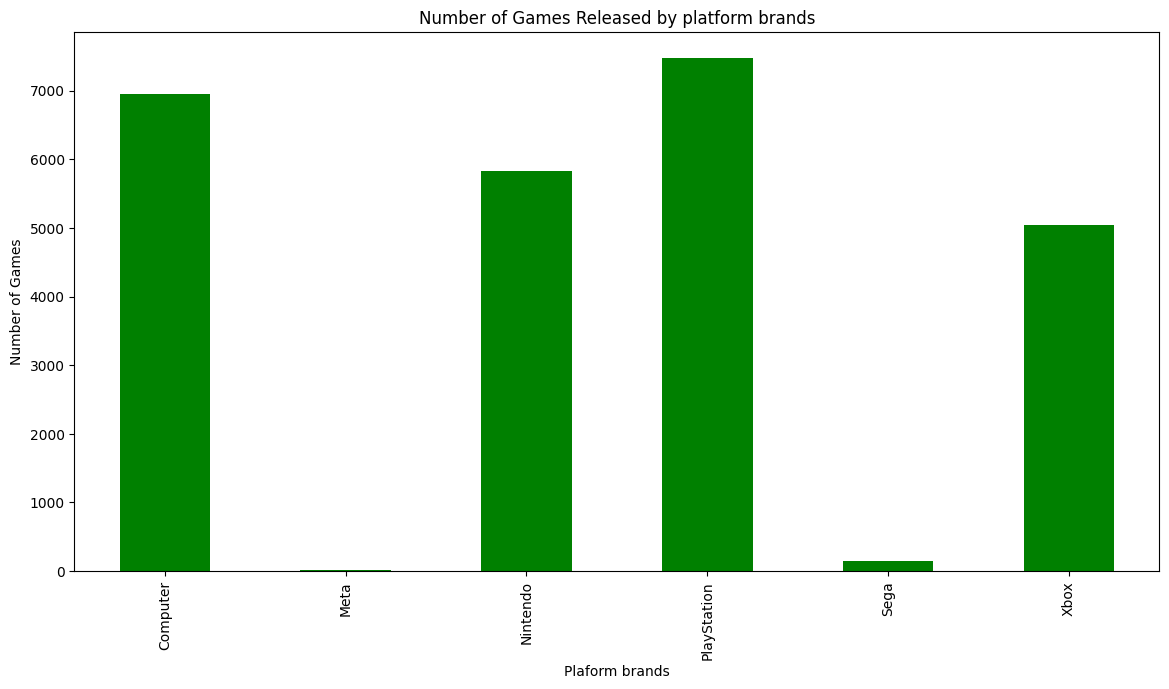

In [65]:
# Number of games released by platforms
games_per_year = games_data_full_new['platform_brand'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
games_per_year.plot(kind='bar', color='g')
plt.title('Number of Games Released by platform brands')
plt.xlabel('Plaform brands')
plt.ylabel('Number of Games')
plt.show()

<ipython-input-66-1ddf78831dcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_data_full_new['total_critic_counts'] = games_data_full_new[['critic_positive', 'critic_neutral', 'critic_negative']].sum(axis=1)


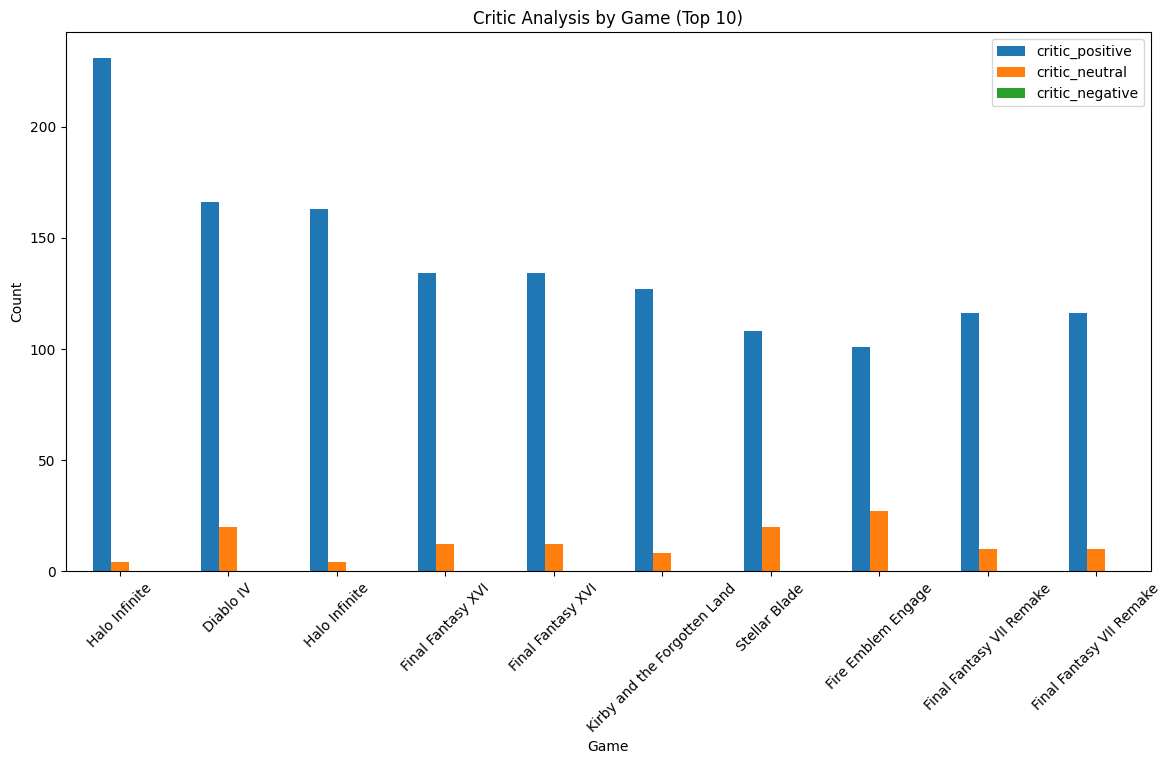

In [66]:
# Calculate the total critic counts for each game
games_data_full_new['total_critic_counts'] = games_data_full_new[['critic_positive', 'critic_neutral', 'critic_negative']].sum(axis=1)

# Sort the games by total critic counts in descending order
sorted_games = games_data_full_new.sort_values(by='total_critic_counts', ascending=False)

# Select the top 10 games
top_10_games = sorted_games.head(10).set_index('name')

# Analysis by name of the game counting all critic_positive, critic_neutral, critic_negative
critic_analysis = top_10_games[['critic_positive', 'critic_neutral', 'critic_negative']]

# Plot Critic Analysis for Top 10 Games
critic_analysis.plot(kind='bar', figsize=(14, 7), title='Critic Analysis by Game (Top 10)')
plt.xlabel('Game')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-67-953a071453b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_data_full_new['total_user_counts'] = games_data_full_new[['user_positive', 'user_neutral', 'critic_negative']].sum(axis=1)


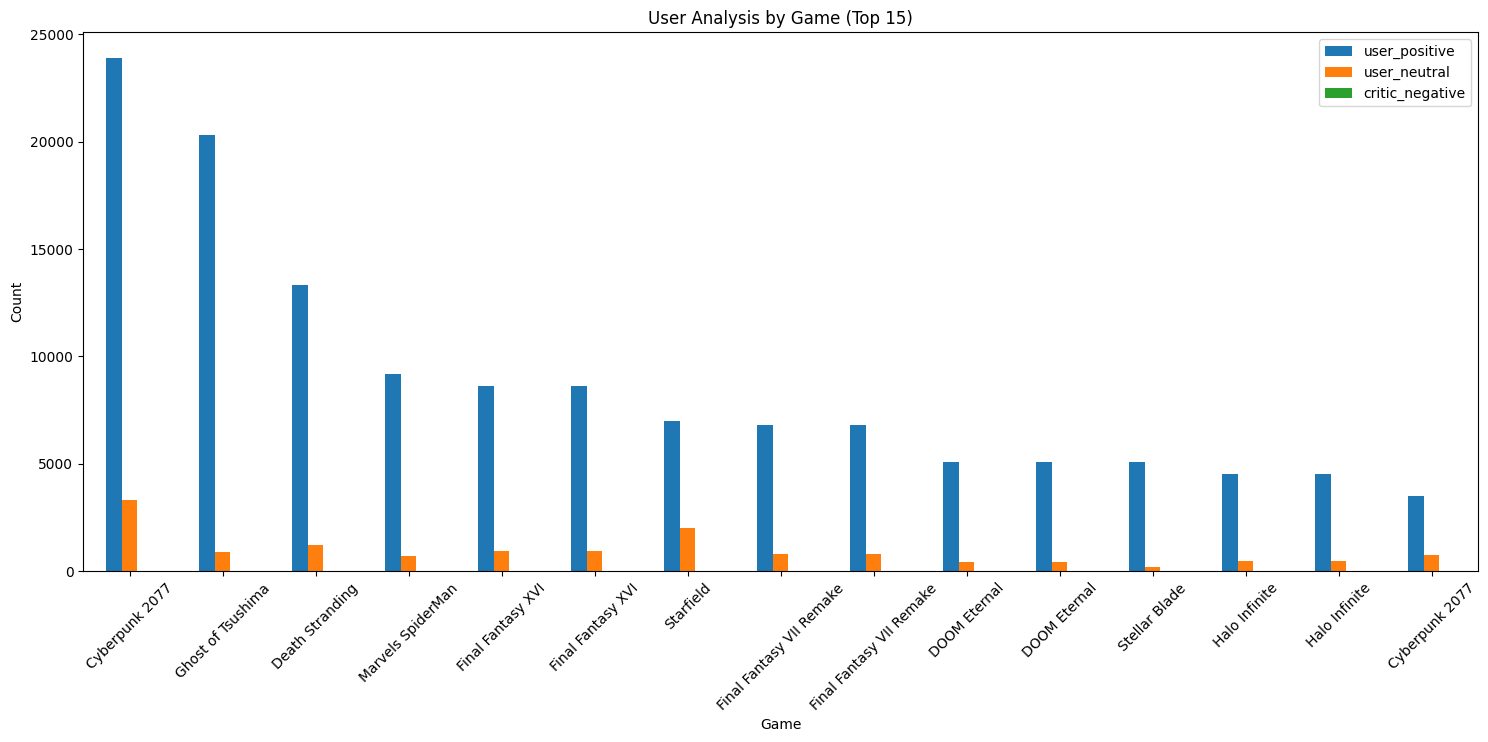

In [67]:
# Calculate the total user counts for each game
games_data_full_new['total_user_counts'] = games_data_full_new[['user_positive', 'user_neutral', 'critic_negative']].sum(axis=1)

# Sort the games by total critic counts in descending order
sorted_games_user = games_data_full_new.sort_values(by='total_user_counts', ascending=False)

# Select the top 15 games
top_15_games_user = sorted_games_user.head(15).set_index('name')

# Analysis by name of the game counting all critic_positive, critic_neutral, critic_negative
user_analysis = top_15_games_user[['user_positive', 'user_neutral', 'critic_negative']]

# Plot Critic Analysis for Top 15 Games
user_analysis.plot(kind='bar', figsize=(18, 7), title='User Analysis by Game (Top 15)')
plt.xlabel('Game')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [68]:
#Make a copy of the dataset
df_copy = games_data_full_new.copy()

# 2. Drop the specified columns
columns_to_drop = ['platform', 'developer', 'publisher', 'genre(s)', 'release_date', 'metascore', 'user_score', 'Year', 'Month', 'platform_brand']
df_copy = df_copy.drop(columns=columns_to_drop)

# 3. Group by the game name and sum the values for specified columns
aggregated_df = df_copy.groupby('name').sum().reset_index()

# 4. Perform basic analysis
# Analysis example: descriptive statistics
analysis = aggregated_df.describe()

# Print the resulting DataFrame and analysis
print("Aggregated DataFrame:")
print(aggregated_df)
print("\nAnalysis:")
print(analysis)

Aggregated DataFrame:
                              name  critic_positive  critic_neutral  \
0            0 Day Attack on Earth                0               5   
1                      007 Legends                2              22   
2                    007 NightFire                4               6   
3            007 Quantum of Solace               32             109   
4                       007 Racing                1               9   
...                            ...              ...             ...   
15023   theHunter Call of the Wild               12               9   
15024                 uDraw Studio                2               7   
15025  uDraw Studio Instant Artist                1               6   
15026                   uWordsmith                0               0   
15027                          xXx                1               6   

       critic_negative  user_positive  user_neutral  user_negative  \
0                   14              0             0    

In [69]:
# Finding the game with the highest sum of positive user reviews
top_game_user_positive = aggregated_df.loc[aggregated_df['user_positive'].idxmax()]
print("\nGame with the highest sum of positive user reviews:")
print(top_game_user_positive)


Game with the highest sum of positive user reviews:
name                   Cyberpunk 2077
critic_positive                    97
critic_neutral                     47
critic_negative                    14
user_positive                   31007
user_neutral                     4443
user_negative                   18052
total_critic_counts               158
total_user_counts               35464
Name: 2628, dtype: object


In [70]:
# Finding the game with the highest sum of critic positive reviews
top_game_critic_positive = aggregated_df.loc[aggregated_df['critic_positive'].idxmax()]
print("\nGame with the highest sum of critic positive reviews:")
print(top_game_critic_positive)


Game with the highest sum of critic positive reviews:
name                   Halo Infinite
critic_positive                  516
critic_neutral                    16
critic_negative                    0
user_positive                  12826
user_neutral                    1338
user_negative                   3836
total_critic_counts              532
total_user_counts              14164
Name: 5475, dtype: object


In [71]:
# Group by year and genre to calculate average metascore and count the number of games
grouped_data = games_data_full_new.groupby(['Year', 'genre(s)']).agg({
    'metascore': 'mean',
    'name': 'count'
}).reset_index()

grouped_data.rename(columns={'name': 'number_of_games'}, inplace=True)

# Plotting with Plotly
fig = px.scatter(
    grouped_data,
    x='Year',
    y='metascore',
    size='number_of_games',
    color='genre(s)',
    hover_name='genre(s)',
    size_max=60,
    title='Yearly Metascore by Genre with Game Counts'
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Average Metascore',
    legend_title_text='Genres',
    template='plotly_white'
)

fig.show()

**SALES DATA**

In [147]:
# Download the dataset from the kaggle
!kaggle datasets download -d samanfatima7/cleaned-global-video-game-sales-dataset

Dataset URL: https://www.kaggle.com/datasets/samanfatima7/cleaned-global-video-game-sales-dataset
License(s): unknown
  0% 0.00/275k [00:00<?, ?B/s]
100% 275k/275k [00:00<00:00, 95.3MB/s]


In [148]:
# Unzip files
!unzip cleaned-global-video-game-sales-dataset.zip

Archive:  cleaned-global-video-game-sales-dataset.zip
  inflating: cleaned_global_video_game_sales.csv  


In [149]:
sales_games_data = pd.read_csv('cleaned_global_video_game_sales.csv')
sales_games_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon RedPokemon Blue,GB,1996,Role Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


**Rank**: Integer ranking of the video game based on sales.

**Name**:* Name of the video game.*

**Platform**: Gaming platform the video game is available on (e.g., PS4, Xbox).

**Year**: Year of release of the video game.

**Genre**: Category or type of the video game (e.g., Action, Adventure).

**Publisher**: Company that published the video game.

**NA_Sales**: Sales of the video game in North America (in millions).

**EU_Sales**: Sales of the video game in Europe (in millions).

**JP_Sales**: Sales of the video game in Japan (in millions).

**Other_Sales**: Sales of the video game in other regions (in millions).

**Global_Sales**: Total global sales of the video game (in millions).

In [150]:
sales_games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11470 entries, 0 to 11469
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          11470 non-null  int64  
 1   Name          11470 non-null  object 
 2   Platform      11470 non-null  object 
 3   Year          11470 non-null  int64  
 4   Genre         11470 non-null  object 
 5   Publisher     11470 non-null  object 
 6   NA_Sales      11470 non-null  float64
 7   EU_Sales      11470 non-null  float64
 8   JP_Sales      11470 non-null  float64
 9   Other_Sales   11470 non-null  float64
 10  Global_Sales  11470 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 985.8+ KB


In [151]:
sales_games_data.shape

(11470, 11)

In [152]:
sales_games_data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,11470.000000,11470.000000,11470.000000,11470.000000,11470.000000,11470.000000,11470.000000
mean,8293.056757,1976.790846,0.285488,0.157714,0.104155,0.050868,0.598443
std,4917.895465,238.905301,0.940182,0.572520,0.364020,0.214558,1.789962
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,3963.250000,2002.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8325.500000,2007.000000,0.070000,0.020000,0.000000,0.010000,0.170000
75%,12644.750000,2010.000000,0.240000,0.110000,0.060000,0.030000,0.500000
max,16599.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [153]:
sales_games_data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [154]:
sales_games_data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [155]:
sales_games_data['Year'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000,    0, 1995, 2016,
       1991, 1981, 1987, 1980, 1983, 2020, 2017])

In [196]:
sales_games_data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'XThreeSixZero', 'PSThree', 'PSTow',
       'SNES', 'GBA', 'ThreeDS', 'PSFour', 'NSixFour', 'PS', 'XB', 'PC',
       'TowSixZeroZero', 'PSP', 'GC', 'WiiU', 'GEN', 'XOne', 'DC', 'SAT',
       'PSV', 'SCD', 'WS', 'NG', 'TGOneSix', 'ThreeDO', 'GG', 'PCFX'],
      dtype=object)

In [156]:
sales_games_data[sales_games_data['Year'] == 0]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
159,180,Madden NFL TwoZeroZeroFour,PSTow,0,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
325,378,FIFA Soccer TwoZeroZeroFour,PSTow,0,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
406,471,wwe Smackdown vs Raw TwoZeroZeroSix,PSTow,0,Fighting,Unknown,1.57,1.02,0.00,0.41,3.00
522,608,Space Invaders,TowSixZeroZero,0,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
537,625,Rock Band,XThreeSixZero,0,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
...,...,...,...,...,...,...,...,...,...,...,...
11090,16068,Aquaman Battle for Atlantis,XB,0,Action,Unknown,0.01,0.00,0.00,0.00,0.01
11182,16194,Homeworld Remastered Collection,PC,0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01
11184,16197,Shorts,DS,0,Platform,Unknown,0.01,0.00,0.00,0.00,0.01
11220,16249,Agarest Senki Reappearance,PSThree,0,Role Playing,Idea Factory,0.00,0.00,0.01,0.00,0.01


In [157]:
# Filter the DataFrame to get rows where 'Year' is 0
filtered_games = sales_games_data[sales_games_data['Year'] == 0]

# Extract the 'Name' column from the filtered DataFrame
game_names = filtered_games['Name'].tolist()

# Print the list of game names
print(game_names)

['Madden NFL TwoZeroZeroFour', 'FIFA Soccer TwoZeroZeroFour', 'wwe Smackdown vs Raw TwoZeroZeroSix', 'Space Invaders', 'Rock Band', 'Froggers Adventures Temple of the Frog', 'Triple Play NineNine', 'LEGO Harry Potter Years FiveSeven', 'Adventure', 'Combat', 'NASCAR Thunder TwoZeroZeroThree', 'Legacy of Kain Soul Reaver', 'Donkey Kong Land III', 'AirSea Battle', 'Suikoden III', 'Yakuza Four', 'The Lord of the Rings War in the North', 'MLB SlugFest TwoZeroZeroThree', 'Shaun White Snowboarding', 'WarioWare Twisted', 'Test Drive Unlimited Two', 'The Chronicles of Narnia The Lion The Witch and The Wardrobe', 'Monster Hunter Two', 'Advance Wars Days of Ruin', 'Metal Gear Solid Two Substance', 'NASCAR Dirt to Daytona', 'Fishing Derby', 'Karate', 'Circus Atari', 'The Chronicles of Riddick Escape from Butcher Bay', 'Maze Craze A Game of Cops n Robbers', 'Silent Hill Homecoming', 'Super Breakout', 'Robert Ludlums The Bourne Conspiracy', 'NHL Slapshot', 'TERA', 'NFL GameDay TwoZeroZeroThree', 'Ha

In [158]:
# List of game names
game_names = [
    'Madden NFL TwoZeroZeroFour', 'FIFA Soccer TwoZeroZeroFour', 'wwe Smackdown vs Raw TwoZeroZeroSix', 'Space Invaders',
    'Rock Band', 'Froggers Adventures Temple of the Frog', 'Triple Play NineNine', 'LEGO Harry Potter Years FiveSeven',
    'Adventure', 'Combat', 'NASCAR Thunder TwoZeroZeroThree', 'Legacy of Kain Soul Reaver', 'Donkey Kong Land III',
    'AirSea Battle', 'Suikoden III', 'Yakuza Four', 'The Lord of the Rings War in the North', 'MLB SlugFest TwoZeroZeroThree',
    'Shaun White Snowboarding', 'WarioWare Twisted', 'Test Drive Unlimited Two', 'The Chronicles of Narnia The Lion The Witch and The Wardrobe',
    'Monster Hunter Two', 'Advance Wars Days of Ruin', 'Metal Gear Solid Two Substance', 'NASCAR Dirt to Daytona', 'Fishing Derby',
    'Karate', 'Circus Atari', 'The Chronicles of Riddick Escape from Butcher Bay', 'Maze Craze A Game of Cops n Robbers', 'Silent Hill Homecoming',
    'Super Breakout', 'Robert Ludlums The Bourne Conspiracy', 'NHL Slapshot', 'TERA', 'NFL GameDay TwoZeroZeroThree', 'Harvest Moon Save the Homeland',
    'Hangman', 'Bejeweled Three', 'Cubix Robots for Everyone Clash n Bash', 'Tropico Four', 'Dragon Ball Z Budokai Tenkaichi Two JP sales',
    'Final Fantasy XI', 'Singularity', 'Dragster', 'AllStar Baseball TwoZeroZeroFive', 'Star Wars Jedi Knight II Jedi Outcast', 'Slot Machine',
    'The Dukes of Hazzard II Daisy Dukes It Out', 'Disgaea Three Absence of Detention', 'Haven Call of the King', 'Unreal Championship Two The Liandri Conflict',
    'The Legend of Zelda The Minish Capweekly JP sales', 'Indy FiveZeroZero', 'Flag Capture', 'College Hoops TwoKSix', 'Mega Man X Collection',
    'DanceDanceRevolution II', 'Tony Hawks Downhill Jam', 'Big Beach Sports Two', 'Jet XTwoZero', 'Tribes Aerial Assault', 'Move Fitness',
    'Yu Yu Hakusho Dark Tournament', 'Ghostbusters II', 'Breakaway IV', 'Valkyria Chronicles III Unrecorded Chronicles', 'WRC FIA World Rally Championship',
    'Famista SixFour', 'Pet Zombies', 'Star Trek Legacy', 'Trauma Team', 'Backbreaker', 'Twisted Metal Small Brawl', 'Otomedius Excellent', 'NBA Starting Five',
    'James Camerons Dark Angel', 'Sword of the Samurai', 'Alone in the Dark The New Nightmare', 'Vegas Party', 'Jurassic Park The Game', 'Home Run',
    'eJay Clubworld', 'Our House Party', 'Disneys Cinderella Magical Dreams', 'Nintendo Puzzle Collection', 'Charm Girls Club My Fashion Mall',
    'Record of Agarest War Zero', 'Super Robot Wars OG Saga Masou Kishin II  Revelation of Evil God', 'Saru Get You Million Monkeys', 'The Daring Game for Girls',
    'Happy Feet Two', 'GiFTPiA', 'Disneys Chicken Little Ace In Action', 'Atsumare Power Pro Kun no DS Koushien', 'My Healthy Cooking Coach',
    'Luminous Arc Two JP sales', 'Egg Monster Hero', 'Demon Chaos', 'Action ManOperation Extreme', 'Super Puzzle Fighter II', 'Charm Girls Club My Fashion Show',
    'Face Racers Photo Finish', 'Zero Tsukihami no Kamen', 'The Hidden', 'Mega Man Battle Network Operation Shooting Star', 'Smashing Drive', 'Dream Trigger ThreeD',
    'Tornado', 'McFarlanes Evil Prophecy', 'Drake of the NineNine Dragons', 'Port Royale Three', 'BuildABear Workshop Friendship Valley', 'Alex Rider Stormbreaker',
    'Yoostar on MTV', 'Jewel Link Chronicles Mountains of Madness', 'Chou Soujuu Mecha MG', 'Prinny Can I Really Be The Hero US sales', 'Combat Elite WWII Paratroopers',
    'Flips Twisted World', 'Mobile Ops The One Year War', 'Tom Clancys Rainbow Six Critical Hour', 'Reader Rabbit Twond Grade', 'Mountain Bike Adrenaline',
    'Tour de France TwoZeroOneOne', 'Drill Dozer', 'Battle vs Chess', 'BLUE Legend of Water', 'Luxor Pharaohs Challenge', 'Sega Rally TwoZeroZeroSix',
    'Swords', 'HalfMinute Hero Two', 'Clockwork Empires', 'Housekeeping', 'Sabre Wulf', 'Beyond the Labyrinth', 'Bikkuriman Daijiten', 'Majesty Two The Fantasy Kingdom Sim',
    'Fullmetal Alchemist Brotherhood', 'Samurai Spirits Tenkaichi Kenkakuden', 'Super Duper Sumos', 'Legacy of Ys Books I  II', 'The King of Fighters Maximum Impact  Maniax',
    'Combat Wings The Great Battles of WWII', 'Tube Slider', 'Umineko no Naku Koro ni San Shinjitsu to Gensou no Yasoukyoku', 'Wii de Asobu Metroid Prime', 'Payout Poker  Casino',
    'Saint', 'Steal Princess', 'YuGiOh FiveDs Wheelie Breakers JP sales', 'Writing and Speaking Beautiful Japanese DS', 'Virtua Quest', 'Shonen Jumps YuGiOh GX Card Almanac',
    'Football Manager TwoZeroZeroSeven', 'Ferrari The Race Experience', 'Dinotopia The Sunstone Odyssey', 'Jet Impulse', 'Dream Dancer', 'Aquaman Battle for Atlantis',
    'Homeworld Remastered Collection', 'Shorts', 'Agarest Senki Reappearance', 'Hakuouki Shinsengumi Kitan'
]

# List of game release year
years_list = [2003, 2003, 2005, 1978, 2007, 2001, 1998, 2011, 1980, 1977, 2002, 1999, 1997, 1977, 2002, 2010, 2011, 2002, 2008, 2004, 2011, 2005, 2006, 2008, 2002, 2002, 1980, 1982,
              1980, 2004, 1978, 2008, 1978, 2008, 2010, 2011, 2002, 2001, 1978, 2010, 2002, 2011, 2006, 2002, 2010, 1980, 2004, 2002, 1979, 2000, 2012, 2002, 2005, 2004, 1977, 1978,
              2005, 2006, 2011, 2006, 2010, 2002, 2002, 2011, 2004, 1989, 1981, 2011, 2010, 1997, 2011, 2006, 2010, 2010, 2001, 2011, 2002, 2002, 1989, 2001, 2008, 2011, 1978, 2001,
              2009, 2005, 2003, 2009, 2010, 2012, 2006, 2009, 2011, 2003, 2006, 2006, 2009, 2007, 2005, 2005, 2000, 1996, 2009, 2011, 2008, 2011, 2009, 2000, 2011, 1983, 2004, 2003,
              2012, 2010, 2006, 2011, 2011, 2006, 2008, 2005, 2010, 2007, 2006, 1998, 2007, 2011, 2005, 2011, 2005, 2007, 2006, 2011, 2011, 2004, 2004, 2004, 2011, 2007, 2009, 2009,
              2005, 2003, 2009, 2004, 2008, 2003, 2010, 2009, 2006, 2008, 2008, 2009, 2009, 2005, 2007, 2006, 2010, 2003, 2006, 2006, 2003, 2015, 2015, 2015, 2008]

# Checking that the length of lists the same
print(len(game_names))
print(len(years_list))

165
165


In [159]:
# Updating the 'Year' column based on game names and corresponding years
for game_name, year in zip(game_names, years_list):
    # Locate the rows that match the game name and have a Year value of 0
    mask = (sales_games_data['Name'] == game_name) & (sales_games_data['Year'] == 0)
    # Update these rows with the corresponding year from years_list
    sales_games_data.loc[mask, 'Year'] = year

print(sales_games_data)

        Rank                                               Name Platform  \
0          1                                         Wii Sports      Wii   
1          2                                   Super Mario Bros      NES   
2          3                                     Mario Kart Wii      Wii   
3          4                                  Wii Sports Resort      Wii   
4          5                            Pokemon RedPokemon Blue       GB   
...      ...                                                ...      ...   
11465  16592  Chou Ezaru wa Akai Hana Koi wa Tsuki ni Shirub...      PSV   
11466  16593  Eiyuu Densetsu Sora no Kiseki Material Collect...      PSP   
11467  16595                                           Plushees       DS   
11468  16596              Woody Woodpecker in Crazy Castle Five      GBA   
11469  16599                                       Know How Two       DS   

       Year         Genre           Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2

In [160]:
# Checking unique values of the column Year
sales_games_data['Year'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000, 1995, 2016, 1991,
       1981, 1987, 1980, 1983, 1978, 1977, 1979, 2020, 2017])

In [161]:
# Checking unique values of the column Publisher
sales_games_data['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'TakeTwo Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', 'FiveZeroFive Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Unknown', 'Majesco Entertainment', 'Codemasters', 'Red Orb',
       'Level Five', 'Midway Games', 'JVC', 'Deep Silver',
       'NineEightNine Studios', 'NCSoft', 'UEP Systems', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
       'Minds

In [162]:
unknown_publisher = sales_games_data[sales_games_data['Publisher'] == 'Unknown']

# Extract the 'Name' column from the filtered DataFrame
game_names = unknown_publisher['Name'].tolist()

# Print the list of game names
print(game_names)

['wwe Smackdown vs Raw TwoZeroZeroSix', 'Gran Turismo Concept TwoZeroZeroOne Tokyo', 'Triple Play NineNine', 'NASCAR Thunder TwoZeroZeroThree', 'Shrek  Shrek Two TwoinOne Gameboy Advance Video', 'Suikoden III', 'Bentleys Hackpack', 'Blitz The League', 'The Game of Life', 'MLB SlugFest TwoZeroZeroThree', 'WarioWare Twisted', 'God Eater', 'RIFT', 'Nicktoons Collection Game Boy Advance Video Volume One', 'SpongeBob SquarePants Game Boy Advance Video Volume One', 'NASCAR Dirt to Daytona', 'Two Worlds II', 'SpongeBob SquarePants Game Boy Advance Video Volume Two', 'The Fairly Odd Parents Game Boy Advance Video Volume One', 'NHL Slapshot', 'The Fairly Odd Parents Game Boy Advance Video Volume Two', 'TERA', 'NFL GameDay TwoZeroZeroThree', 'Harvest Moon Save the Homeland', 'Bejeweled Three', 'Cubix Robots for Everyone Clash n Bash', 'Dragon Ball Z Budokai Tenkaichi Two JP sales', 'Final Fantasy XI', 'Singularity', 'Cartoon Network Collection Game Boy Advance Video Platinum Edition', 'AllStar B

In [163]:
from csv import list_dialects
game_list_unk_publisher = ['wwe Smackdown vs Raw TwoZeroZeroSix', 'Gran Turismo Concept TwoZeroZeroOne Tokyo', 'Triple Play NineNine', 'NASCAR Thunder TwoZeroZeroThree',
                           'Shrek  Shrek Two TwoinOne Gameboy Advance Video', 'Suikoden III', 'Bentleys Hackpack', 'Blitz The League', 'The Game of Life',
                           'MLB SlugFest TwoZeroZeroThree', 'WarioWare Twisted', 'God Eater', 'RIFT', 'Nicktoons Collection Game Boy Advance Video Volume One',
                           'SpongeBob SquarePants Game Boy Advance Video Volume One', 'NASCAR Dirt to Daytona', 'Two Worlds II',
                           'SpongeBob SquarePants Game Boy Advance Video Volume Two', 'The Fairly Odd Parents Game Boy Advance Video Volume One', 'NHL Slapshot',
                           'The Fairly Odd Parents Game Boy Advance Video Volume Two', 'TERA', 'NFL GameDay TwoZeroZeroThree', 'Harvest Moon Save the Homeland',
                           'Bejeweled Three', 'Cubix Robots for Everyone Clash n Bash', 'Dragon Ball Z Budokai Tenkaichi Two JP sales', 'Final Fantasy XI', 'Singularity',
                           'Cartoon Network Collection Game Boy Advance Video Platinum Edition', 'AllStar Baseball TwoZeroZeroFive', 'The Dukes of Hazzard II Daisy Dukes It Out',
                           'Fast Food', 'The Legend of Zelda The Minish Capweekly JP sales', 'MMs Blast', 'Ultimate NES Remix', 'Sonic X Game Boy Advance Video Volume One',
                           'Dora the Explorer Game Boy Advance Video Volume One', 'College Hoops TwoKSix', 'Cartoon Network Collection Game Boy Advance Video Volume One',
                           'Mega Man X Collection', 'All Grown Up Game Boy Advance Video Volume One', 'Jet XTwoZero', 'Tribes Aerial Assault',
                           'Nicktoons Collection Game Boy Advance Video Volume Two', 'YoostarTwo', 'Afrika', 'Yu Yu Hakusho Dark Tournament',
                           'Now Thats What I Call Music Dance  Sing', 'SpongeBob SquarePants Game Boy Advance Video Volume Three', 'ChibiRobo Park Patrol',
                           'Thomas the Tank Engine  Friends', 'Trauma Team', 'Backbreaker', 'Heavy Fire Afghanistan', 'Twisted Metal Small Brawl', 'Otomedius Excellent',
                           'NBA Starting Five', 'Dragon Ball GT Game Boy Advance Video Volume One', 'Codename Kids Next Door Game Boy Advance Video Volume One',
                           'Teenage Mutant Ninja Turtles Game Boy Advance Video Volume One', 'Stronghold Three', 'Kid Adventures Sky Captain', 'Vegas Party',
                           'Jurassic Park The Game', 'Cartoon Network Collection Game Boy Advance Video Special Edition', 'Kids Learn Math A Edition',
                           'Pokmon Johto Photo Finish Game Boy Advance Video', 'Strawberry Shortcake Game Boy Advance Video Volume One', 'Black  Rock Shooter The Game',
                           'Our House Party', 'Barbie Explorer', 'Power Gig Rise of the SixString', 'Farming Simulator TwoZeroOneOne', 'Nintendo Puzzle Collection',
                           'Charm Girls Club My Fashion Mall', 'Super Robot Wars OG Saga Masou Kishin II  Revelation of Evil God', 'Saru Get You Million Monkeys',
                           'The Daring Game for Girls', 'Mystery PI  Portrait of a Thief', 'AKBFourEightMe', 'GiFTPiA', 'Saigo no Yakusoku no Monogatari',
                           'Disney Channel Collection Vol One', 'Atsumare Power Pro Kun no DS Koushien', 'Baten Kaitos Origins', 'My Healthy Cooking Coach',
                           'Luminous Arc Two JP sales', 'Action ManOperation Extreme', 'Thomas  Friends Hero of the Rails', 'Martian Panic',
                           'Charm Girls Club My Fashion Show', 'The Hidden', 'Cartoon Network Collection Game Boy Advance Video Volume Two', 'The Golf Club',
                           'Smashing Drive', 'Speed', 'Drake of the NineNine Dragons', 'Alpha and Omega', 'Fairy Tail Zelef Kakusei', 'BuildABear Workshop Friendship Valley',
                           'Yoostar on MTV', 'Max  the Magic Marker', 'Kururin Paradise', 'Chou Soujuu Mecha MG', 'Prinny Can I Really Be The Hero US sales',
                           'Combat Elite WWII Paratroopers', 'Pheasants Forever Wingshooter', 'Flips Twisted World', 'Tom Clancys Rainbow Six Critical Hour',
                           'Reader Rabbit Twond Grade', 'Samantha Swift and the Hidden Roses of Athena', 'Mountain Bike Adrenaline', 'Drill Dozer', 'Kids Learn Music A Edition',
                           'Metal Max Two Reloaded', 'The Lost Treasures of Alexandria', 'Guilty Gear XX Accent Core', 'Jewel Quest Mysteries Two Trail of the Midnight Heart',
                           'BLUE Legend of Water', 'Men of War Vietnam', 'North American Hunting Extravaganza Two', 'Sega Rally TwoZeroZeroSix', 'Train Simulator TwoZeroOneSix',
                           'Worms Ultimate Mayhem', 'Janes Hotel', 'Swords', 'Clockwork Empires', 'Housekeeping', 'Gekiatsu Pachi Game Tamashi CR Evangelion  Hajimari no Fukuin',
                           'Junior Island Adventure', 'The Binding of Isaac', 'Beastly', 'Beyond the Labyrinth', 'Foto Showdown', 'Bikkuriman Daijiten', 'Silverlicious',
                           'Majesty Two The Fantasy Kingdom Sim', 'Super Meat Boy Ultra Edition', 'Fullmetal Alchemist Brotherhood', 'Take On Helicopters',
                           'Samurai Spirits Tenkaichi Kenkakuden', 'Gekiatsu Pachi Game Tamashi Vol One CR Evangelion  Shinjitsu no Tsubasa', 'Heroes of Hellas Two Olympia',
                           'Gekiatsu Pachi Game Tamashi Vol Two CR Evangelion  Shinjitsu no Tsubasa', 'Ao no Kanata no Four Rhythm', 'Super Duper Sumos', 'UK Truck Simulator',
                           'Magicka Collection', 'Legacy of Ys Books I  II', 'The King of Fighters Maximum Impact  Maniax', 'Tube Slider', 'Vampire Mansion Linda Hyde',
                           'Umineko no Naku Koro ni San Shinjitsu to Gensou no Yasoukyoku', 'Payout Poker  Casino', 'XiaXia', 'Blender Bros', 'Ukiyo no Roushi',
                           'Cities in Motion Collection', 'Love Once Mermaids Tears', 'Sengoku Otome Legend Battle', 'Saint', 'Steal Princess', 'Dungeon Defenders',
                           'Meikyuu Cross Blood Reloaded', 'Nicktoons Collection Game Boy Advance Video Volume Three', 'Mystery Tales Two The Spirit Mask', 'Airport Simulator',
                           'Disney Sports Football', 'Demolition Company Gold Edition', 'UFO Trilogy', 'YuGiOh FiveDs Wheelie Breakers JP sales', 'Wild West Shootout',
                           'Tantei Opera Milky Holmes', 'Writing and Speaking Beautiful Japanese DS', 'Virtua Quest', 'Clue  Mouse Trap  Perfection  Aggravation',
                           'Moshi Kono Sekai ni Kamisama ga Iru to suru Naraba', 'The Dark Hills of Cherai', 'Dinotopia The Sunstone Odyssey', 'Dream Dancer',
                           'Red Stone DS Akaki Ishi ni Michibikareshi Monotachi', 'Aquaman Battle for Atlantis', 'Fuuraiki Three', 'Dark Parables The Exiled Prince',
                           'Homeworld Remastered Collection', 'Shorts', 'Hyakka Yakou', 'Super Robot Monkey Team Game Boy Advance Video Volume One',
                           'Shitsuji ga Aruji o Erabu Toki', 'War for the Overworld', 'Hakuouki Shinsengumi Kitan', 'Dance with Devils', 'Real Crimes The Unicorn Killer',
                           'Horse Life Four My Horse My Friend My Champion', 'Legends of Oz Dorothys Return', 'STORM Frontline Nation', 'Driving Simulator TwoZeroOneOne',
                           'The Treasures of Mystery Island Three Pack  Save Mystery Island', 'Fit  Fun']

# Filter the dataset for the specified games
filtered_data = games_data_full_new[games_data_full_new['name'].isin(game_list_unk_publisher)]

# Get the publishers for the filtered games
publishers = filtered_data[['name', 'publisher']]

print(publishers)

list_of_publishers = publishers['publisher'].tolist()
print(len(list_of_publishers))

print(len(game_list_unk_publisher))

                                             name               publisher
526    The Dukes of Hazzard II Daisy Dukes It Out         SouthPeak Games
822                Harvest Moon Save the Homeland                 Natsume
1154                    Twisted Metal Small Brawl                    SCEA
1293                                 Suikoden III                  Konami
1312                       NASCAR Dirt to Daytona                   Atari
...                                           ...                     ...
14532             Homeworld Remastered Collection        Gearbox Software
15362                       War for the Overworld      Subterranean Games
16936                           Clockwork Empires           Gaslamp Games
19821                                        TERA  En Masse Entertainment
20085                                        TERA  En Masse Entertainment

[86 rows x 2 columns]
86
200


In [164]:
# Get the names of games that has publishers for the filtered games
list_name_filtered = filtered_data['name'].tolist()
print(list_name_filtered)
print(len(list_name_filtered))

['The Dukes of Hazzard II Daisy Dukes It Out', 'Harvest Moon Save the Homeland', 'Twisted Metal Small Brawl', 'Suikoden III', 'NASCAR Dirt to Daytona', 'NASCAR Dirt to Daytona', 'Blender Bros', 'Tribes Aerial Assault', 'Disney Sports Football', 'Disney Sports Football', 'NBA Starting Five', 'NBA Starting Five', 'Smashing Drive', 'Smashing Drive', 'Final Fantasy XI', 'Tube Slider', 'Super Duper Sumos', 'Dinotopia The Sunstone Odyssey', 'Dinotopia The Sunstone Odyssey', 'Aquaman Battle for Atlantis', 'Aquaman Battle for Atlantis', 'Final Fantasy XI', 'Yu Yu Hakusho Dark Tournament', 'WarioWare Twisted', 'Blitz The League', 'Blitz The League', 'The King of Fighters Maximum Impact  Maniax', 'Combat Elite WWII Paratroopers', 'Virtua Quest', 'Combat Elite WWII Paratroopers', 'Virtua Quest', 'Drill Dozer', 'Mega Man X Collection', 'Baten Kaitos Origins', 'Mega Man X Collection', 'Blitz The League', 'Final Fantasy XI', 'Payout Poker  Casino', 'Tom Clancys Rainbow Six Critical Hour', 'ChibiRobo

In [165]:
# Create a new list by excluding elements from list1 that are present in list2
clean_list = [item for item in game_list_unk_publisher if item not in list_name_filtered]

# Print the result
print(clean_list)
print(len(clean_list))

['wwe Smackdown vs Raw TwoZeroZeroSix', 'Gran Turismo Concept TwoZeroZeroOne Tokyo', 'Triple Play NineNine', 'NASCAR Thunder TwoZeroZeroThree', 'Shrek  Shrek Two TwoinOne Gameboy Advance Video', 'Bentleys Hackpack', 'The Game of Life', 'MLB SlugFest TwoZeroZeroThree', 'God Eater', 'RIFT', 'Nicktoons Collection Game Boy Advance Video Volume One', 'SpongeBob SquarePants Game Boy Advance Video Volume One', 'SpongeBob SquarePants Game Boy Advance Video Volume Two', 'The Fairly Odd Parents Game Boy Advance Video Volume One', 'The Fairly Odd Parents Game Boy Advance Video Volume Two', 'NFL GameDay TwoZeroZeroThree', 'Bejeweled Three', 'Cubix Robots for Everyone Clash n Bash', 'Dragon Ball Z Budokai Tenkaichi Two JP sales', 'Cartoon Network Collection Game Boy Advance Video Platinum Edition', 'AllStar Baseball TwoZeroZeroFive', 'Fast Food', 'The Legend of Zelda The Minish Capweekly JP sales', 'MMs Blast', 'Sonic X Game Boy Advance Video Volume One', 'Dora the Explorer Game Boy Advance Video V

In [166]:
# Get the publishers for the filtered games
list_name_filtered = filtered_data['publisher'].tolist()
print(list_name_filtered)

['SouthPeak Games', 'Natsume', 'SCEA', 'Konami', 'Atari', 'Atari', 'Infogrames', 'Sierra Entertainment', 'Konami', 'Konami', 'Konami', 'Konami', 'Namco', 'Namco', 'Square Enix', 'NEC Interchannel', 'Midway', 'TDK Mediactive', 'TDK Mediactive', 'TDK Mediactive', 'TDK Mediactive', 'SCEA', 'Atari', 'Nintendo', 'Midway', 'Midway', 'SNK Playmore', 'SouthPeak Games', 'Sega', 'SouthPeak Games', 'Sega', 'Nintendo', 'Capcom', 'Nintendo', 'Capcom', 'Midway', 'Square Enix', 'Namco', 'Ubisoft', 'Nintendo', 'Aksys Games', 'Aksys Games', 'Atlus', 'Natsume', 'Atlus', 'Storm City Games', 'Atlus', 'Activision', 'Activision', 'Activision', 'EA Sports', 'Press Play', 'The Games Company', '505 Games', '505 Games', 'Majesco Games', 'Seven45 Studios', 'Seven45 Studios', 'Edmund McMillen', 'Trendy Entertainment', 'Trendy Entertainment', 'Trendy Entertainment', 'TopWare Interactive', 'Bohemia Interactive', 'SouthPeak Games', '1C', 'SouthPeak Games', 'Team 17', 'Telltale Games', 'Team 17', 'Telltale Games', 'T

In [167]:
list_of_games = ['wwe Smackdown vs Raw TwoZeroZeroSix', 'Gran Turismo Concept TwoZeroZeroOne Tokyo', 'Triple Play NineNine', 'NASCAR Thunder TwoZeroZeroThree', 'Shrek  Shrek Two TwoinOne Gameboy Advance Video',
                 'Bentleys Hackpack', 'The Game of Life', 'MLB SlugFest TwoZeroZeroThree', 'God Eater', 'RIFT', 'Nicktoons Collection Game Boy Advance Video Volume One', 'SpongeBob SquarePants Game Boy Advance Video Volume One',
                 'SpongeBob SquarePants Game Boy Advance Video Volume Two', 'The Fairly Odd Parents Game Boy Advance Video Volume One', 'The Fairly Odd Parents Game Boy Advance Video Volume Two', 'NFL GameDay TwoZeroZeroThree',
                 'Bejeweled Three', 'Cubix Robots for Everyone Clash n Bash', 'Dragon Ball Z Budokai Tenkaichi Two JP sales', 'Cartoon Network Collection Game Boy Advance Video Platinum Edition',
                 'AllStar Baseball TwoZeroZeroFive', 'Fast Food', 'The Legend of Zelda The Minish Capweekly JP sales', 'MMs Blast', 'Sonic X Game Boy Advance Video Volume One', 'Dora the Explorer Game Boy Advance Video Volume One',
                 'College Hoops TwoKSix', 'Cartoon Network Collection Game Boy Advance Video Volume One', 'All Grown Up Game Boy Advance Video Volume One', 'Jet XTwoZero', 'Nicktoons Collection Game Boy Advance Video Volume Two',
                 'YoostarTwo', 'Now Thats What I Call Music Dance  Sing', 'SpongeBob SquarePants Game Boy Advance Video Volume Three', 'Thomas the Tank Engine  Friends', 'Dragon Ball GT Game Boy Advance Video Volume One',
                 'Codename Kids Next Door Game Boy Advance Video Volume One', 'Teenage Mutant Ninja Turtles Game Boy Advance Video Volume One', 'Stronghold Three', 'Kid Adventures Sky Captain',
                 'Cartoon Network Collection Game Boy Advance Video Special Edition', 'Kids Learn Math A Edition', 'Pokmon Johto Photo Finish Game Boy Advance Video', 'Strawberry Shortcake Game Boy Advance Video Volume One',
                 'Black  Rock Shooter The Game', 'Our House Party', 'Barbie Explorer', 'Farming Simulator TwoZeroOneOne', 'Nintendo Puzzle Collection', 'Charm Girls Club My Fashion Mall',
                 'Super Robot Wars OG Saga Masou Kishin II  Revelation of Evil God', 'Saru Get You Million Monkeys', 'The Daring Game for Girls', 'Mystery PI  Portrait of a Thief', 'AKBFourEightMe', 'GiFTPiA',
                 'Saigo no Yakusoku no Monogatari', 'Disney Channel Collection Vol One', 'Atsumare Power Pro Kun no DS Koushien', 'My Healthy Cooking Coach', 'Luminous Arc Two JP sales', 'Action ManOperation Extreme',
                 'Thomas  Friends Hero of the Rails', 'Martian Panic', 'Charm Girls Club My Fashion Show', 'The Hidden', 'Cartoon Network Collection Game Boy Advance Video Volume Two', 'Speed', 'Drake of the NineNine Dragons',
                 'Alpha and Omega', 'Fairy Tail Zelef Kakusei', 'BuildABear Workshop Friendship Valley', 'Kururin Paradise', 'Chou Soujuu Mecha MG', 'Prinny Can I Really Be The Hero US sales', 'Pheasants Forever Wingshooter',
                 'Reader Rabbit Twond Grade', 'Samantha Swift and the Hidden Roses of Athena', 'Mountain Bike Adrenaline', 'Kids Learn Music A Edition', 'Metal Max Two Reloaded', 'The Lost Treasures of Alexandria',
                 'Jewel Quest Mysteries Two Trail of the Midnight Heart', 'BLUE Legend of Water', 'North American Hunting Extravaganza Two', 'Sega Rally TwoZeroZeroSix', 'Train Simulator TwoZeroOneSix', 'Janes Hotel',
                 'Swords', 'Housekeeping', 'Gekiatsu Pachi Game Tamashi CR Evangelion  Hajimari no Fukuin', 'Junior Island Adventure', 'Beastly', 'Beyond the Labyrinth', 'Foto Showdown', 'Bikkuriman Daijiten', 'Silverlicious',
                 'Majesty Two The Fantasy Kingdom Sim', 'Super Meat Boy Ultra Edition', 'Fullmetal Alchemist Brotherhood', 'Samurai Spirits Tenkaichi Kenkakuden',
                 'Gekiatsu Pachi Game Tamashi Vol One CR Evangelion  Shinjitsu no Tsubasa', 'Heroes of Hellas Two Olympia', 'Gekiatsu Pachi Game Tamashi Vol Two CR Evangelion  Shinjitsu no Tsubasa', 'Ao no Kanata no Four Rhythm',
                 'UK Truck Simulator', 'Magicka Collection', 'Vampire Mansion Linda Hyde', 'Umineko no Naku Koro ni San Shinjitsu to Gensou no Yasoukyoku', 'XiaXia', 'Ukiyo no Roushi', 'Cities in Motion Collection',
                 'Love Once Mermaids Tears', 'Sengoku Otome Legend Battle', 'Saint', 'Meikyuu Cross Blood Reloaded', 'Nicktoons Collection Game Boy Advance Video Volume Three', 'Mystery Tales Two The Spirit Mask',
                 'Airport Simulator', 'Demolition Company Gold Edition', 'UFO Trilogy', 'YuGiOh FiveDs Wheelie Breakers JP sales', 'Wild West Shootout', 'Tantei Opera Milky Holmes', 'Writing and Speaking Beautiful Japanese DS',
                 'Clue  Mouse Trap  Perfection  Aggravation', 'Moshi Kono Sekai ni Kamisama ga Iru to suru Naraba', 'The Dark Hills of Cherai', 'Dream Dancer', 'Red Stone DS Akaki Ishi ni Michibikareshi Monotachi',
                 'Fuuraiki Three', 'Dark Parables The Exiled Prince', 'Shorts', 'Hyakka Yakou', 'Super Robot Monkey Team Game Boy Advance Video Volume One', 'Shitsuji ga Aruji o Erabu Toki', 'Hakuouki Shinsengumi Kitan',
                 'Dance with Devils', 'Real Crimes The Unicorn Killer', 'Horse Life Four My Horse My Friend My Champion', 'Legends of Oz Dorothys Return', 'STORM Frontline Nation', 'Driving Simulator TwoZeroOneOne',
                 'The Treasures of Mystery Island Three Pack  Save Mystery Island', 'Fit  Fun']

print(len(list_of_games))

145


In [168]:
list_names = ['Clue  Mouse Trap  Perfection  Aggravation', 'Moshi Kono Sekai ni Kamisama ga Iru to suru Naraba', 'The Dark Hills of Cherai', 'Dream Dancer', 'Red Stone DS Akaki Ishi ni Michibikareshi Monotachi',
              'Fuuraiki Three', 'Dark Parables The Exiled Prince', 'Shorts', 'Hyakka Yakou', 'Super Robot Monkey Team Game Boy Advance Video Volume One', 'Shitsuji ga Aruji o Erabu Toki', 'Hakuouki Shinsengumi Kitan',
              'Dance with Devils', 'Real Crimes The Unicorn Killer', 'Horse Life Four My Horse My Friend My Champion', 'Legends of Oz Dorothys Return', 'STORM Frontline Nation', 'Driving Simulator TwoZeroOneOne',
              'The Treasures of Mystery Island Three Pack  Save Mystery Island', 'Fit  Fun',
              'Love Once Mermaids Tears', 'Sengoku Otome Legend Battle', 'Saint', 'Meikyuu Cross Blood Reloaded', 'Nicktoons Collection Game Boy Advance Video Volume Three', 'Mystery Tales Two The Spirit Mask',
              'Airport Simulator', 'Demolition Company Gold Edition', 'UFO Trilogy', 'YuGiOh FiveDs Wheelie Breakers JP sales', 'Wild West Shootout', 'Tantei Opera Milky Holmes', 'Writing and Speaking Beautiful Japanese DS',
              'Gekiatsu Pachi Game Tamashi Vol One CR Evangelion  Shinjitsu no Tsubasa', 'Heroes of Hellas Two Olympia', 'Gekiatsu Pachi Game Tamashi Vol Two CR Evangelion  Shinjitsu no Tsubasa', 'Ao no Kanata no Four Rhythm',
              'UK Truck Simulator', 'Magicka Collection', 'Vampire Mansion Linda Hyde', 'Umineko no Naku Koro ni San Shinjitsu to Gensou no Yasoukyoku', 'XiaXia', 'Ukiyo no Roushi', 'Cities in Motion Collection',
              'Swords', 'Housekeeping', 'Gekiatsu Pachi Game Tamashi CR Evangelion  Hajimari no Fukuin', 'Junior Island Adventure', 'Beastly', 'Beyond the Labyrinth', 'Foto Showdown', 'Bikkuriman Daijiten', 'Silverlicious',
              'Majesty Two The Fantasy Kingdom Sim', 'Super Meat Boy Ultra Edition', 'Fullmetal Alchemist Brotherhood', 'Samurai Spirits Tenkaichi Kenkakuden',
              'Reader Rabbit Twond Grade', 'Samantha Swift and the Hidden Roses of Athena', 'Mountain Bike Adrenaline', 'Kids Learn Music A Edition', 'Metal Max Two Reloaded', 'The Lost Treasures of Alexandria',
              'Jewel Quest Mysteries Two Trail of the Midnight Heart', 'BLUE Legend of Water', 'North American Hunting Extravaganza Two', 'Sega Rally TwoZeroZeroSix', 'Train Simulator TwoZeroOneSix', 'Janes Hotel',
              'Thomas  Friends Hero of the Rails', 'Martian Panic', 'Charm Girls Club My Fashion Show', 'The Hidden', 'Cartoon Network Collection Game Boy Advance Video Volume Two', 'Speed', 'Drake of the NineNine Dragons',
              'Alpha and Omega', 'Fairy Tail Zelef Kakusei', 'BuildABear Workshop Friendship Valley', 'Kururin Paradise', 'Chou Soujuu Mecha MG', 'Prinny Can I Really Be The Hero US sales', 'Pheasants Forever Wingshooter',
              'Super Robot Wars OG Saga Masou Kishin II  Revelation of Evil God', 'Saru Get You Million Monkeys', 'The Daring Game for Girls', 'Mystery PI  Portrait of a Thief', 'AKBFourEightMe', 'GiFTPiA',
              'Saigo no Yakusoku no Monogatari', 'Disney Channel Collection Vol One', 'Atsumare Power Pro Kun no DS Koushien', 'My Healthy Cooking Coach', 'Luminous Arc Two JP sales', 'Action ManOperation Extreme',
              'Cartoon Network Collection Game Boy Advance Video Special Edition', 'Kids Learn Math A Edition', 'Pokmon Johto Photo Finish Game Boy Advance Video', 'Strawberry Shortcake Game Boy Advance Video Volume One',
              'Black  Rock Shooter The Game', 'Our House Party', 'Barbie Explorer', 'Farming Simulator TwoZeroOneOne', 'Nintendo Puzzle Collection', 'Charm Girls Club My Fashion Mall',
              'YoostarTwo', 'Now Thats What I Call Music Dance  Sing', 'SpongeBob SquarePants Game Boy Advance Video Volume Three', 'Thomas the Tank Engine  Friends', 'Dragon Ball GT Game Boy Advance Video Volume One',
              'Codename Kids Next Door Game Boy Advance Video Volume One', 'Teenage Mutant Ninja Turtles Game Boy Advance Video Volume One', 'Stronghold Three', 'Kid Adventures Sky Captain',
              'AllStar Baseball TwoZeroZeroFive', 'Fast Food', 'The Legend of Zelda The Minish Capweekly JP sales', 'MMs Blast', 'Sonic X Game Boy Advance Video Volume One', 'Dora the Explorer Game Boy Advance Video Volume One',
              'College Hoops TwoKSix', 'Cartoon Network Collection Game Boy Advance Video Volume One', 'All Grown Up Game Boy Advance Video Volume One', 'Jet XTwoZero', 'Nicktoons Collection Game Boy Advance Video Volume Two',
              'SpongeBob SquarePants Game Boy Advance Video Volume Two', 'The Fairly Odd Parents Game Boy Advance Video Volume One', 'The Fairly Odd Parents Game Boy Advance Video Volume Two', 'NFL GameDay TwoZeroZeroThree',
              'Bejeweled Three', 'Cubix Robots for Everyone Clash n Bash', 'Dragon Ball Z Budokai Tenkaichi Two JP sales', 'Cartoon Network Collection Game Boy Advance Video Platinum Edition',
              'wwe Smackdown vs Raw TwoZeroZeroSix', 'Gran Turismo Concept TwoZeroZeroOne Tokyo', 'Triple Play NineNine', 'NASCAR Thunder TwoZeroZeroThree', 'The Dukes of Hazzard II Daisy Dukes It Out',
              'Shrek  Shrek Two TwoinOne Gameboy Advance Video', 'Bentleys Hackpack', 'The Game of Life', 'MLB SlugFest TwoZeroZeroThree', 'God Eater', 'RIFT', 'Nicktoons Collection Game Boy Advance Video Volume One',
              'SpongeBob SquarePants Game Boy Advance Video Volume One', 'Harvest Moon Save the Homeland', 'Twisted Metal Small Brawl', 'Suikoden III', 'NASCAR Dirt to Daytona', 'NASCAR Dirt to Daytona',
              'Blender Bros', 'Tribes Aerial Assault', 'Disney Sports Football', 'Disney Sports Football', 'NBA Starting Five', 'NBA Starting Five', 'Smashing Drive', 'Smashing Drive',
              'Final Fantasy XI', 'Tube Slider', 'Super Duper Sumos', 'Dinotopia The Sunstone Odyssey', 'Dinotopia The Sunstone Odyssey', 'Aquaman Battle for Atlantis', 'Aquaman Battle for Atlantis',
              'Final Fantasy XI', 'Yu Yu Hakusho Dark Tournament', 'WarioWare Twisted', 'Blitz The League', 'Blitz The League', 'The King of Fighters Maximum Impact  Maniax', 'Combat Elite WWII Paratroopers',
              'Virtua Quest', 'Combat Elite WWII Paratroopers', 'Virtua Quest', 'Drill Dozer', 'Mega Man X Collection', 'Baten Kaitos Origins', 'Mega Man X Collection', 'Blitz The League', 'Final Fantasy XI',
              'Payout Poker  Casino', 'Tom Clancys Rainbow Six Critical Hour', 'ChibiRobo Park Patrol', 'Guilty Gear XX Accent Core', 'Guilty Gear XX Accent Core', 'Legacy of Ys Books I  II', 'Afrika', 'Steal Princess',
              'Vegas Party', 'Trauma Team', 'Singularity', 'Singularity', 'Singularity', 'NHL Slapshot', 'Max  the Magic Marker', 'Max  the Magic Marker', 'Backbreaker', 'Backbreaker', 'Flips Twisted World',
              'Power Gig Rise of the SixString', 'Power Gig Rise of the SixString', 'The Binding of Isaac', 'Dungeon Defenders', 'Dungeon Defenders', 'Dungeon Defenders', 'Two Worlds II', 'Take On Helicopters',
              'Two Worlds II', 'Men of War Vietnam', 'Two Worlds II', 'Worms Ultimate Mayhem', 'Jurassic Park The Game', 'Worms Ultimate Mayhem', 'Jurassic Park The Game', 'Jurassic Park The Game', 'Yoostar on MTV',
              'Otomedius Excellent', 'Heavy Fire Afghanistan', 'TERA', 'Worms Ultimate Mayhem', 'The Golf Club', 'Ultimate NES Remix', 'The Golf Club', 'The Golf Club', 'Homeworld Remastered Collection', 'War for the Overworld',
              'Clockwork Empires', 'TERA', 'TERA']

list_publishers = ['DSI Games', 'Front Wing', 'Alawar Entertainment', 'Oxygen Games', 'GameOn', 'Success Corporation', 'Big Fish Games', 'Warner Bros. Interactive Entertainment', 'Idea Factory',
                   'Majesco Entertainment', 'QuinRose', 'Idea Factory', 'Rejet', 'AWE Games', 'Koch Media', 'GameMill Entertainment', 'Just A Game', 'Excalibur Publishing', 'Alawar Entertainment', 'Ubisoft',
                   'Cateia Games', 'Spike Chunsoft', 'Bandai Namco Entertainment', 'CyberFront Corporation', 'Majesco Entertainment', 'Artifex Mundi', 'UIG Entertainment', 'Giants Software', 'Nordic Games',
                   'Konami', 'PlayFirst', 'Bushiroad', 'CYBERFRONT Corporation', 'Fields Corporation', 'Alawar Entertainment', 'Fields Corporation', 'Sprite', 'Excalibur Publishing', 'Paradox Interactive', 'ValuSoft',
                   'Alchemist', 'Nordic Games', 'Yumekobo', 'Paradox Interactive', 'Frima Studio', 'Blue Elf', 'Fields Corporation', 'Conspiracy Entertainment', 'Storm City Games', 'Konami', 'Konami', 'Konami',
                   'GameMill Entertainment', 'Paradox Interactive', 'Team Meat', 'Square Enix', 'SNK', 'The Learning Company', 'MumboJumbo', 'Valcon Games', 'VTech', 'Kadokawa Games', 'PlayFirst', 'MumboJumbo',
                   'Rocket Company', 'ValuSoft', 'Sega', 'Dovetail Games', 'Realore',
                   'Nitroplus Co., Ltd', 'Conspiracy Entertainment', 'Electronic Arts', '1C Company', 'Majesco Entertainment', 'Activision', 'Majesco Entertainment', 'D3Publisher', 'Konami', 'The Game Factory',
                   'Nintendo', 'Sandlot', 'NIS America', 'Activision', 'Namco Bandai Games', 'Sony Computer Entertainment', 'Majesco Entertainment', 'PopCap Games', 'Namco Bandai Games', 'Nintendo', 'Namco Bandai Games',
                   'Buena Vista Games', 'Konami', 'Ubisoft',
                   'Marvelous Entertainment', 'Hasbro Interactive', 'Majesco Entertainment', 'Vtech', 'Majesco Entertainment', 'Majesco Entertainment', 'NIS America', 'Majesco Entertainment', 'Vivendi Universal Games',
                   'Astragon Software', 'Nintendo', 'Electronic Arts', 'Yoostar Entertainment Group', 'Nordic Games Publishing', 'Majesco Entertainment', 'THQ', 'Majesco Entertainment', 'Majesco Entertainment',
                   'Majesco Entertainment', 'SouthPeak Games', ' D3Publisher', 'Acclaim Sports', 'Codemasters', 'Nintendo', 'Destination Software', 'Majesco Entertainment', 'Majesco Entertainment', '2K Sports',
                   'Majesco Entertainment', 'Majesco Entertainment', 'Sony Computer Entertainment', 'Majesco Entertainment', 'Majesco Entertainment', 'Majesco Entertainment', 'Majesco Entertainment', '989 Sports',
                   'PopCap Games', '3DO', 'Bandai Namco Entertainment (JP)', 'Majesco Entertainment', 'THQ', 'Sony Computer Entertainment', 'EA Sports', 'EA Sports', 'SouthPeak Games', 'Majesco Entertainment',
                   'Sony Computer Entertainment', 'Hasbro Interactive', 'Midway Games', 'Bandai Namco Entertainment', 'Trion Worlds', 'Majesco Entertainment', 'Majesco Entertainment', 'Natsume', 'SCEA', 'Konami',
                   'Atari', 'Atari', 'Infogrames', 'Sierra Entertainment', 'Konami', 'Konami', 'Konami', 'Konami', 'Namco', 'Namco', 'Square Enix', 'NEC Interchannel', 'Midway', 'TDK Mediactive', 'TDK Mediactive',
                   'TDK Mediactive', 'TDK Mediactive', 'SCEA', 'Atari', 'Nintendo', 'Midway', 'Midway', 'SNK Playmore', 'SouthPeak Games', 'Sega', 'SouthPeak Games', 'Sega',
                   'Nintendo', 'Capcom', 'Nintendo', 'Capcom', 'Midway', 'Square Enix', 'Namco', 'Ubisoft', 'Nintendo', 'Aksys Games', 'Aksys Games', 'Atlus', 'Natsume', 'Atlus', 'Storm City Games', 'Atlus', 'Activision',
                   'Activision', 'Activision', 'EA Sports', 'Press Play', 'The Games Company', '505 Games', '505 Games', 'Majesco Games', 'Seven45 Studios', 'Seven45 Studios', 'Edmund McMillen', 'Trendy Entertainment',
                   'Trendy Entertainment', 'Trendy Entertainment', 'TopWare Interactive', 'Bohemia Interactive', 'SouthPeak Games', '1C', 'SouthPeak Games', 'Team 17', 'Telltale Games', 'Team 17', 'Telltale Games',
                   'Telltale Games', 'Yoostar Entertainment Group', 'Konami', 'Mastiff', 'En Masse Entertainment', 'Team 17', 'HB Studios Multimedia', 'Nintendo', 'HB Studios Multimedia', 'HB Studios Multimedia',
                   'Gearbox Software', 'Subterranean Games', 'Gaslamp Games', 'En Masse Entertainment', 'En Masse Entertainment']

# Checking that the length of lists the same
print(len(list_names))
print(len(list_publishers))

231
231


In [169]:
# Updating the 'Publisher' column based on game names
for name, publisher in zip(list_names, list_publishers):
    # Locate the rows that match the game name and have a Publisher value 'Unknown'
    mask = (sales_games_data['Name'] == name) & (sales_games_data['Publisher'] == 'Unknown')
    # Update these rows with the corresponding Publisher from the list
    sales_games_data.loc[mask, 'Publisher'] = publisher

print(sales_games_data)

        Rank                                               Name Platform  \
0          1                                         Wii Sports      Wii   
1          2                                   Super Mario Bros      NES   
2          3                                     Mario Kart Wii      Wii   
3          4                                  Wii Sports Resort      Wii   
4          5                            Pokemon RedPokemon Blue       GB   
...      ...                                                ...      ...   
11465  16592  Chou Ezaru wa Akai Hana Koi wa Tsuki ni Shirub...      PSV   
11466  16593  Eiyuu Densetsu Sora no Kiseki Material Collect...      PSP   
11467  16595                                           Plushees       DS   
11468  16596              Woody Woodpecker in Crazy Castle Five      GBA   
11469  16599                                       Know How Two       DS   

       Year         Genre           Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2

In [170]:
unknown_publisher = sales_games_data[sales_games_data['Publisher'] == 'Unknown']

# Extract the 'Name' column from the filtered DataFrame
game_names = unknown_publisher['Name'].tolist()

# Print the list of game names
print(game_names)
print(len(game_names))

[]
0


In [171]:
# Displaing top 10 games by global sales
top_10_games = sales_games_data.nlargest(10, 'Global_Sales')[['Rank', 'Name', 'Global_Sales']]
print(top_10_games)

   Rank                      Name  Global_Sales
0     1                Wii Sports         82.74
1     2          Super Mario Bros         40.24
2     3            Mario Kart Wii         35.82
3     4         Wii Sports Resort         33.00
4     5   Pokemon RedPokemon Blue         31.37
5     6                    Tetris         30.26
6     7      New Super Mario Bros         30.01
7     8                  Wii Play         29.02
8     9  New Super Mario Bros Wii         28.62
9    10                 Duck Hunt         28.31


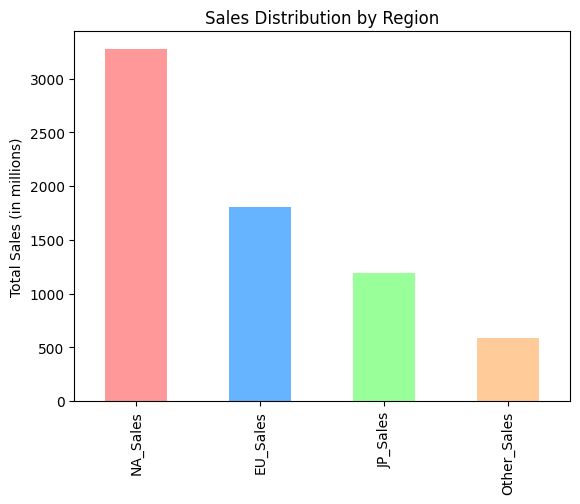

In [172]:
# Ploting sales distribution by region
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sales_games_data[regions].sum().plot(kind='bar', color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Sales Distribution by Region')
plt.ylabel('Total Sales (in millions)')
plt.show()

<ipython-input-173-57cf9fd1f42b>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




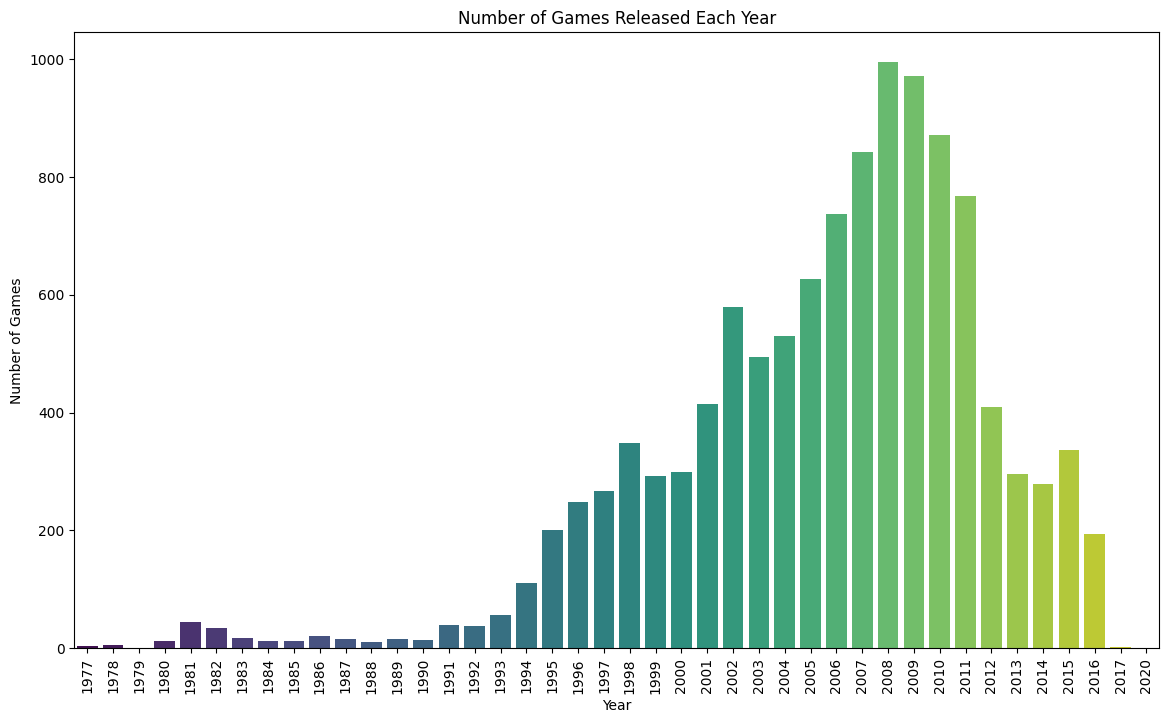

In [173]:
# Plot number of games released each year
plt.figure(figsize=(14, 8))
sns.countplot(x='Year', data=sales_games_data, palette='viridis')
plt.title('Number of Games Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.show()

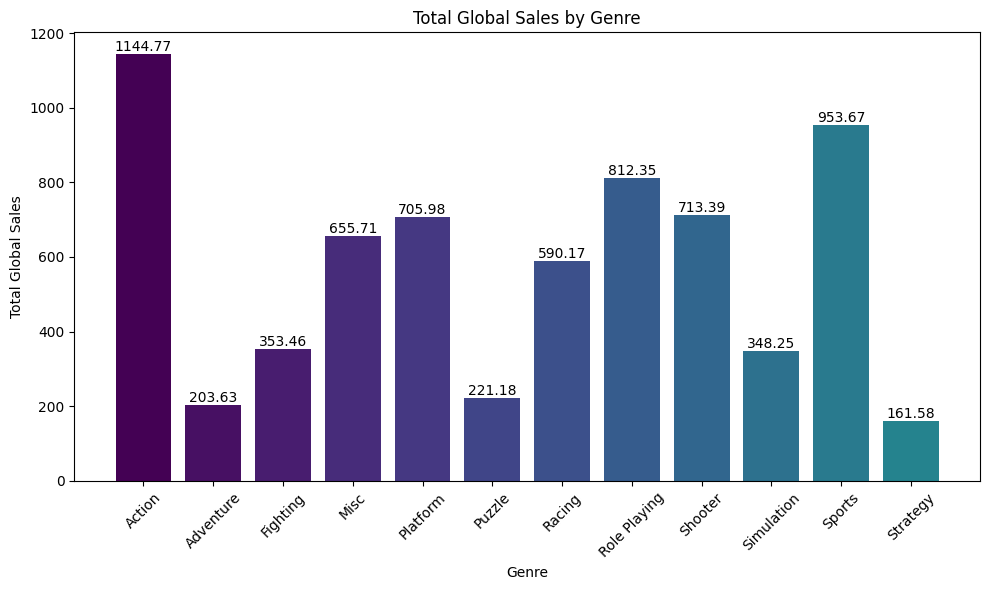

In [175]:
# Group by the "Genre" column and sum the "Global_Sales"
grouped_data = sales_games_data.groupby("Genre")["Global_Sales"].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 2))
bars = plt.bar(grouped_data.index, grouped_data.values, color=colors)

# Add number labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X coordinate
        height,  # Y coordinate
        f'{height:.2f}',  # Text label with 2 decimal places
        ha='center',  # Horizontal alignment
        va='bottom'  # Vertical alignment
    )
plt.xlabel("Genre")
plt.ylabel("Total Global Sales")
plt.title("Total Global Sales by Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

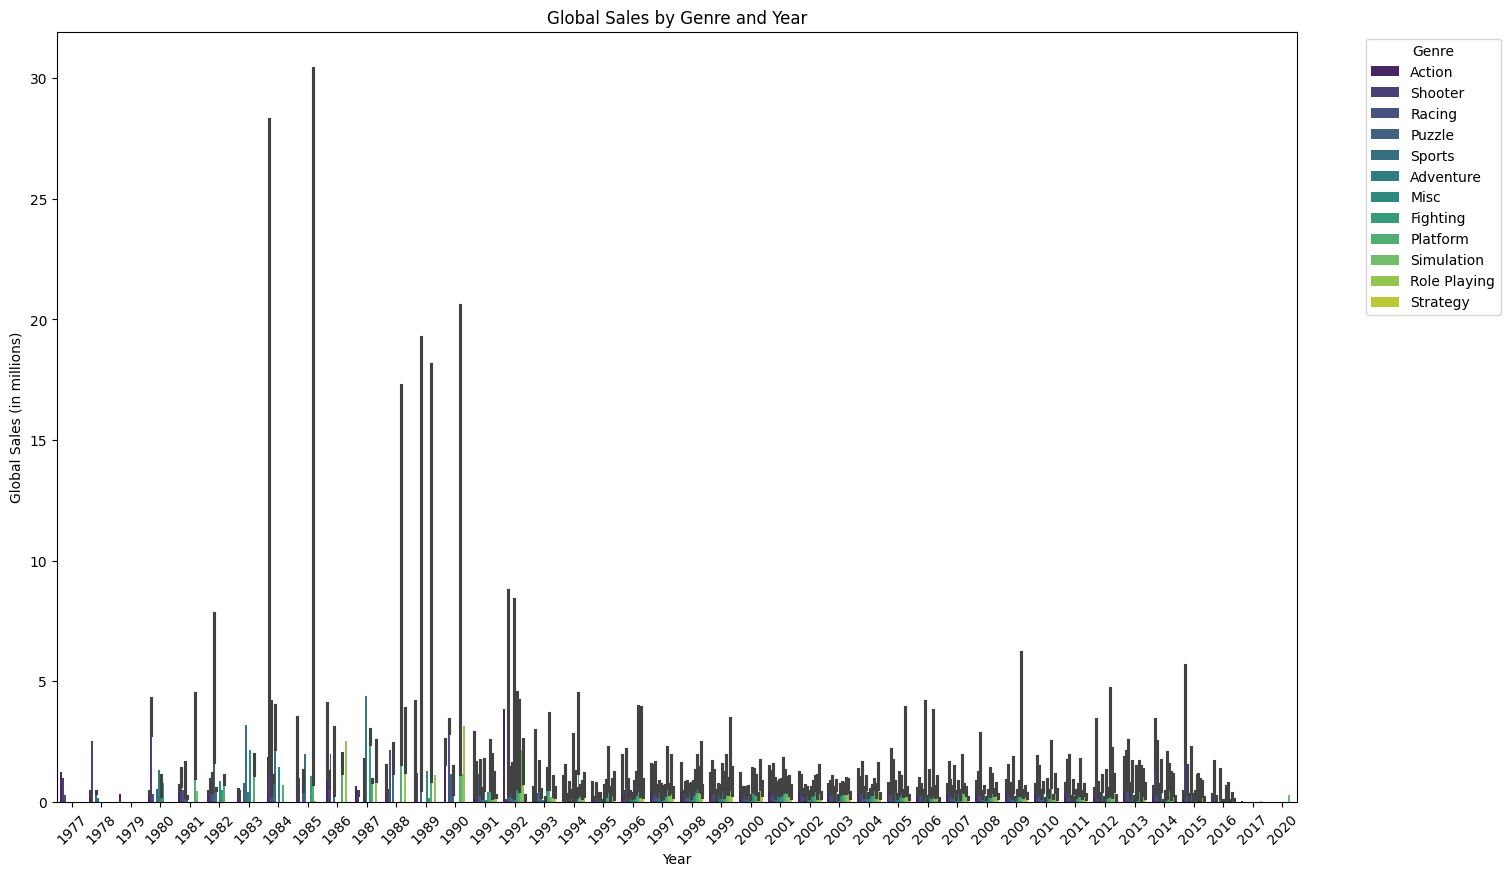

In [176]:
# Global Sales by Genre and Year
plt.figure(figsize=(16, 10))
sns.barplot(x='Year', y='Global_Sales', hue='Genre', data=sales_games_data, palette='viridis')
plt.title('Global Sales by Genre and Year')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

<ipython-input-177-94c87a913bdb>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




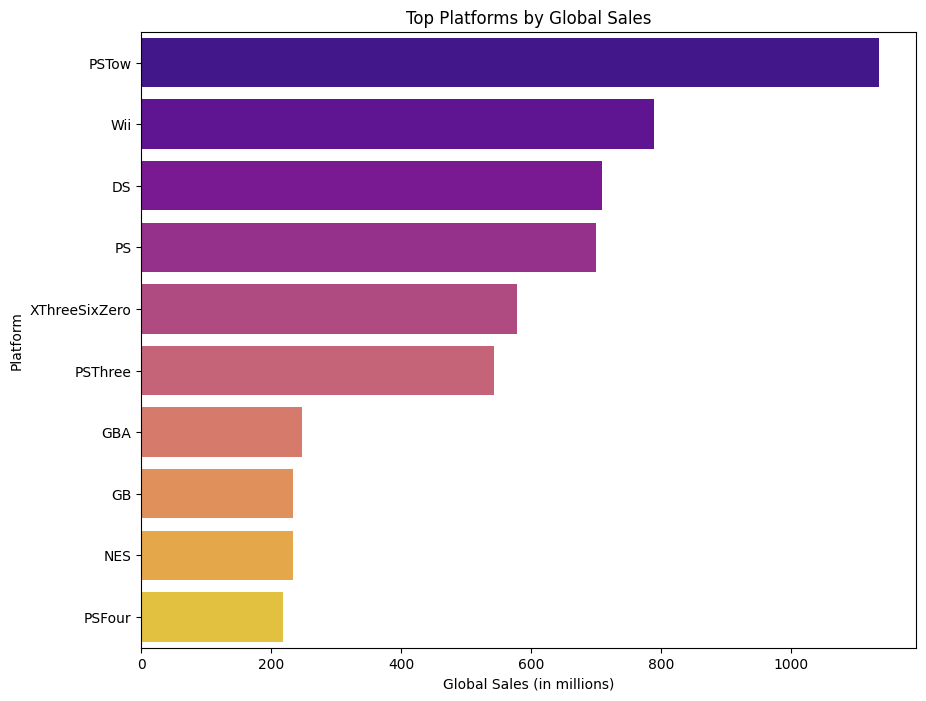

In [177]:
# Sales by platform
plt.figure(figsize=(10, 8))
top_platforms = sales_games_data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_platforms.values, y=top_platforms.index, palette='plasma')
plt.title('Top Platforms by Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Platform')
plt.show()

In [178]:
# Interactive sales by genre and year
fig = px.bar(sales_games_data, x='Year', y='Global_Sales', color='Genre', title='Global Sales by Genre and Year',
             labels={'Global_Sales': 'Global Sales (in millions)', 'Year': 'Year'}, barmode='group')
fig.show()

In [179]:
# Interactive sales by Global Sales, Publisher, Name and Year
fig = px.scatter(sales_games_data, x='Year', y='Global_Sales', size='Global_Sales', color='Publisher', hover_name='Name',
                 title='Global Sales by Publisher', labels={'Global_Sales': 'Global Sales (in millions)', 'Year': 'Year'},
                 size_max=60)
fig.show()

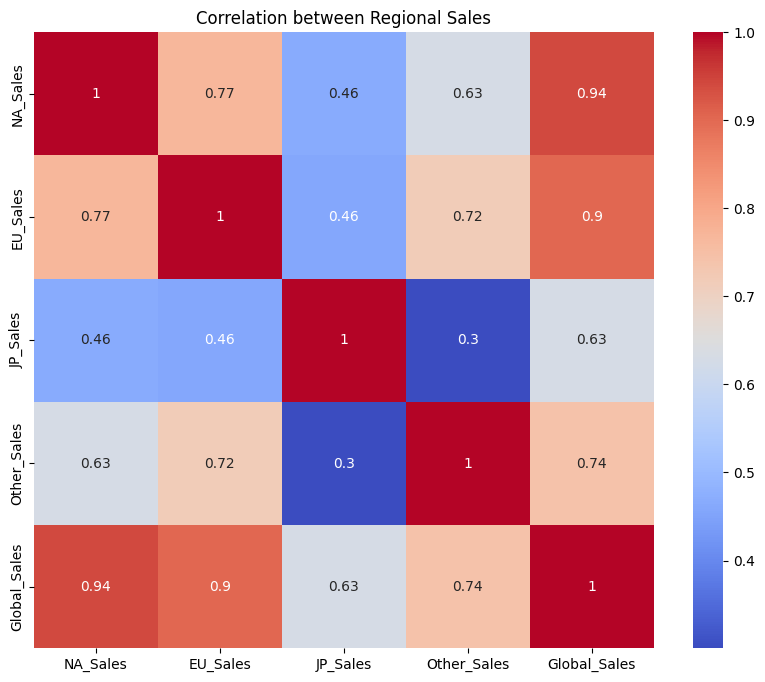

In [180]:
# Correlation between regional sales
plt.figure(figsize=(10, 8))
sns.heatmap(sales_games_data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Regional Sales')
plt.show()

In [181]:
# Function to get the best-selling game for each year in a given region
def best_selling_games_by_year(region):
    best_selling = sales_games_data.loc[sales_games_data.groupby('Year')[region].idxmax()]
    return best_selling[['Year', 'Name', region]]

# Get best-selling games for each region
best_na = best_selling_games_by_year('NA_Sales')
best_eu = best_selling_games_by_year('EU_Sales')
best_jp = best_selling_games_by_year('JP_Sales')
best_other = best_selling_games_by_year('Other_Sales')

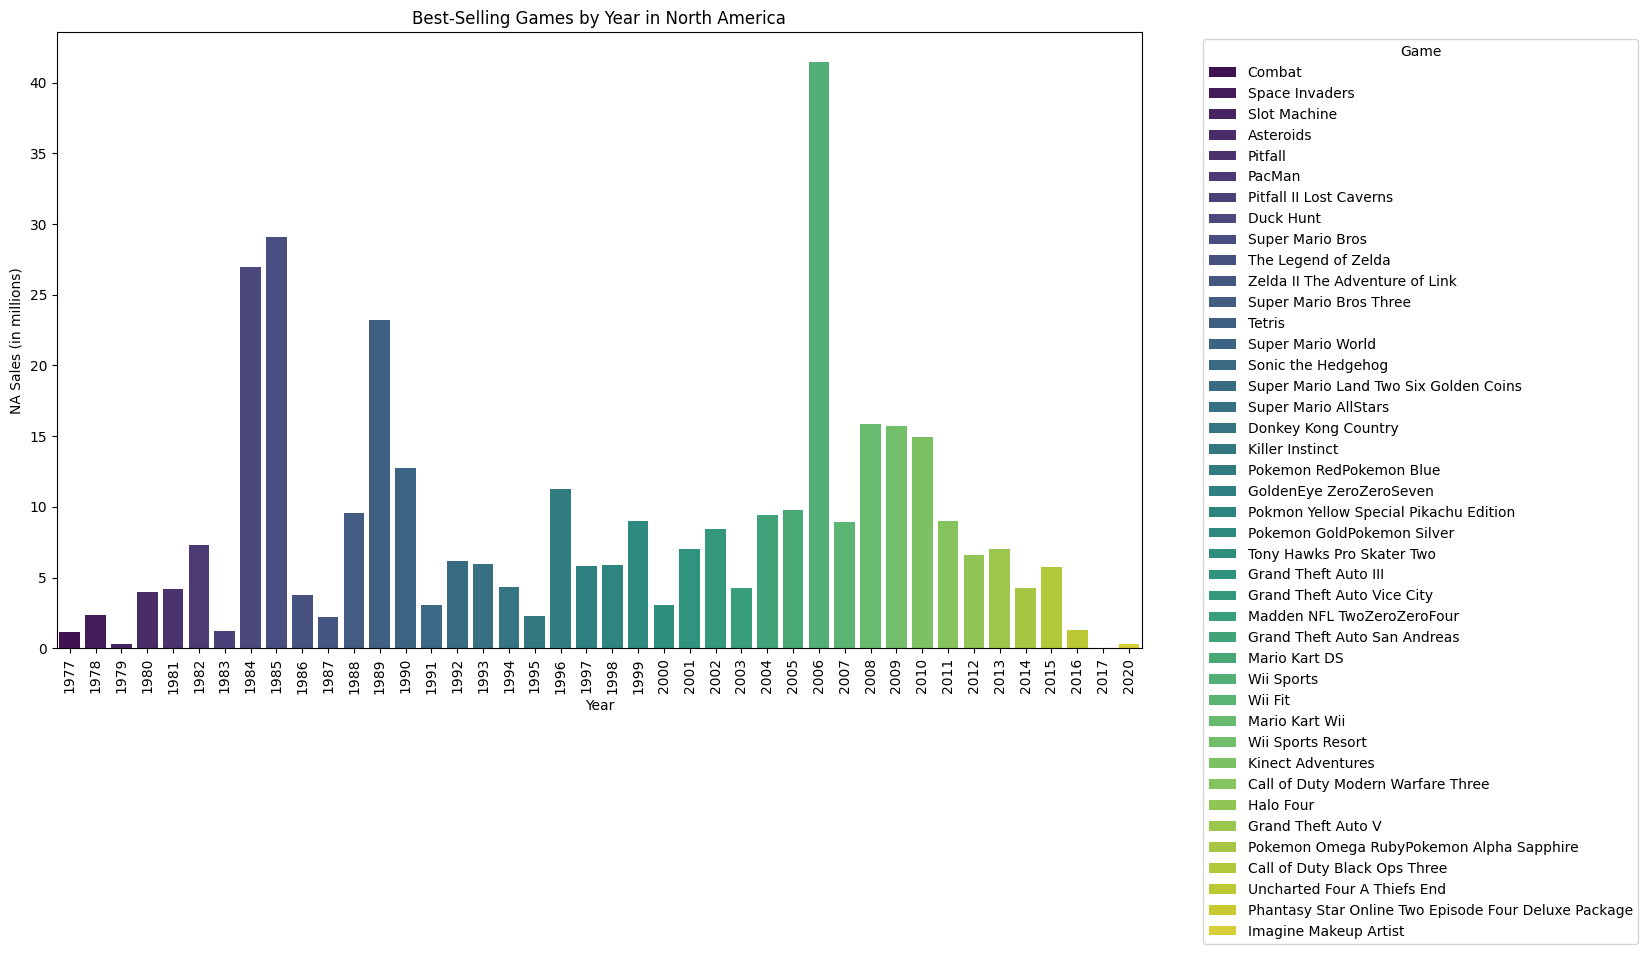

Best-Selling Game in North America:
Year: 2006, Name: Wii Sports, Sales: 41.49


In [182]:
# Best-Selling Games by Year in North America
plt.figure(figsize=(14, 8))
sns.barplot(x='Year', y='NA_Sales', hue='Name', data=best_na, palette='viridis')
plt.title('Best-Selling Games by Year in North America')
plt.xlabel('Year')
plt.ylabel('NA Sales (in millions)')
plt.xticks(rotation=90)
plt.legend(title='Game', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Find the row with the maximum sales value for each region
max_na = best_na.loc[best_na['NA_Sales'].idxmax()]

# Print the results
print("Best-Selling Game in North America:")
print(f"Year: {max_na['Year']}, Name: {max_na['Name']}, Sales: {max_na['NA_Sales']}")

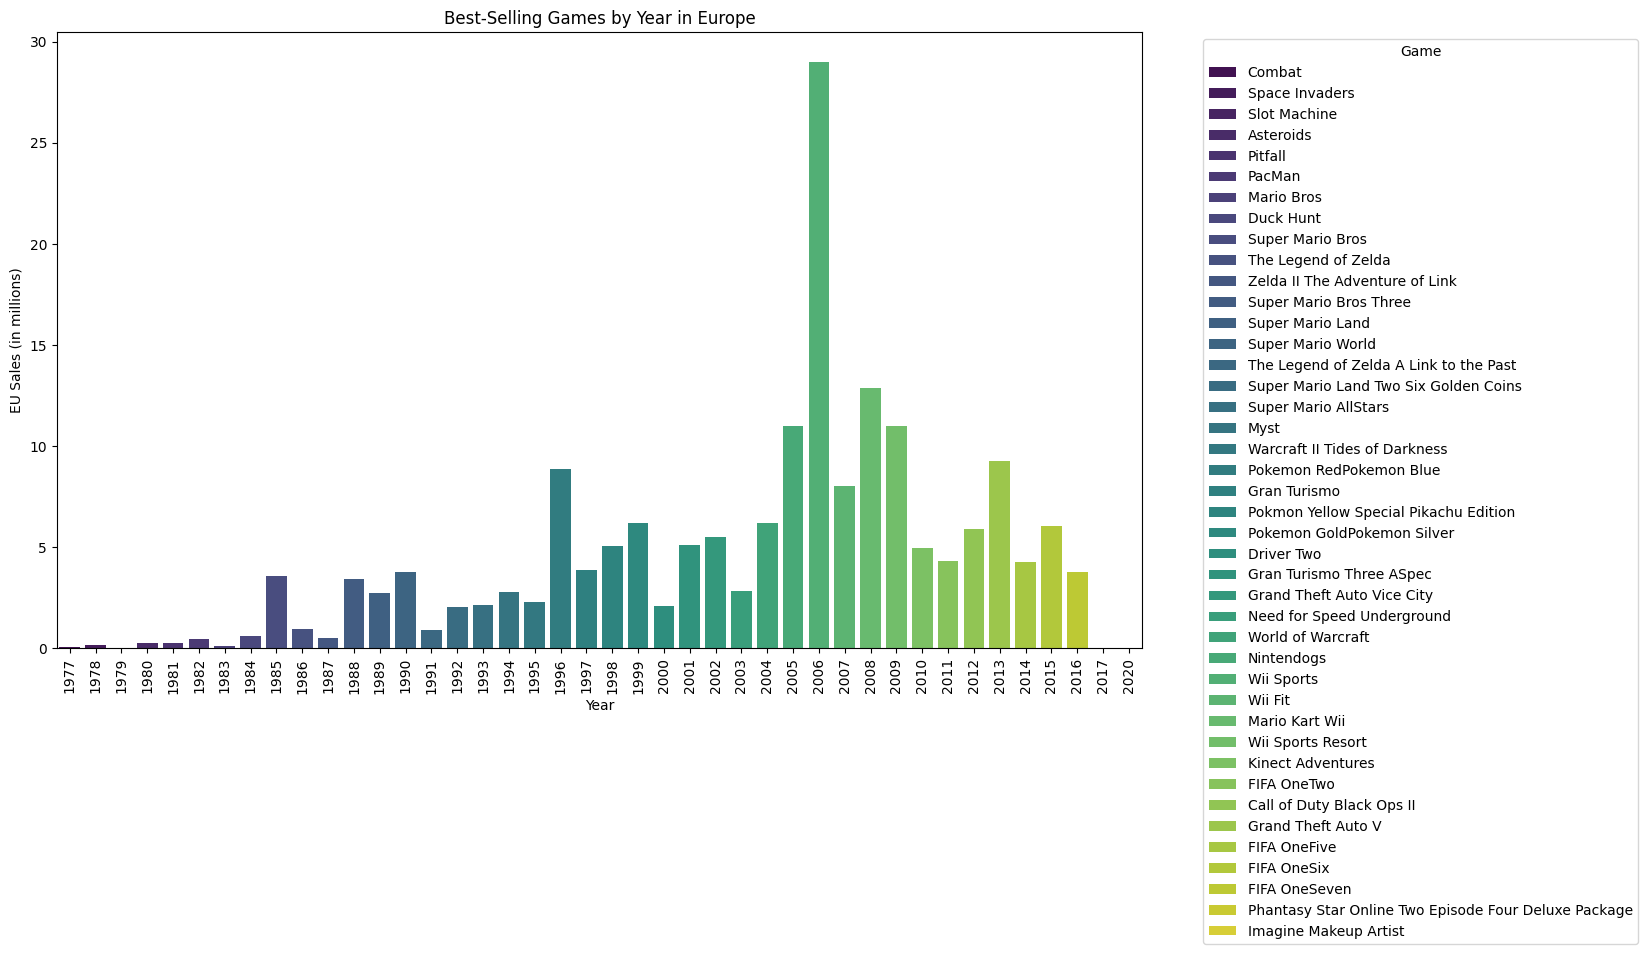


Best-Selling Game in Europe:
Year: 2006, Name: Wii Sports, Sales: 29.02


In [183]:
# Best-Selling Games by Year in Europe
plt.figure(figsize=(14, 8))
sns.barplot(x='Year', y='EU_Sales', hue='Name', data=best_eu, palette='viridis')
plt.title('Best-Selling Games by Year in Europe')
plt.xlabel('Year')
plt.ylabel('EU Sales (in millions)')
plt.xticks(rotation=90)
plt.legend(title='Game', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Find the row with the maximum sales value for each region
max_eu = best_eu.loc[best_eu['EU_Sales'].idxmax()]

print("\nBest-Selling Game in Europe:")
print(f"Year: {max_eu['Year']}, Name: {max_eu['Name']}, Sales: {max_eu['EU_Sales']}")

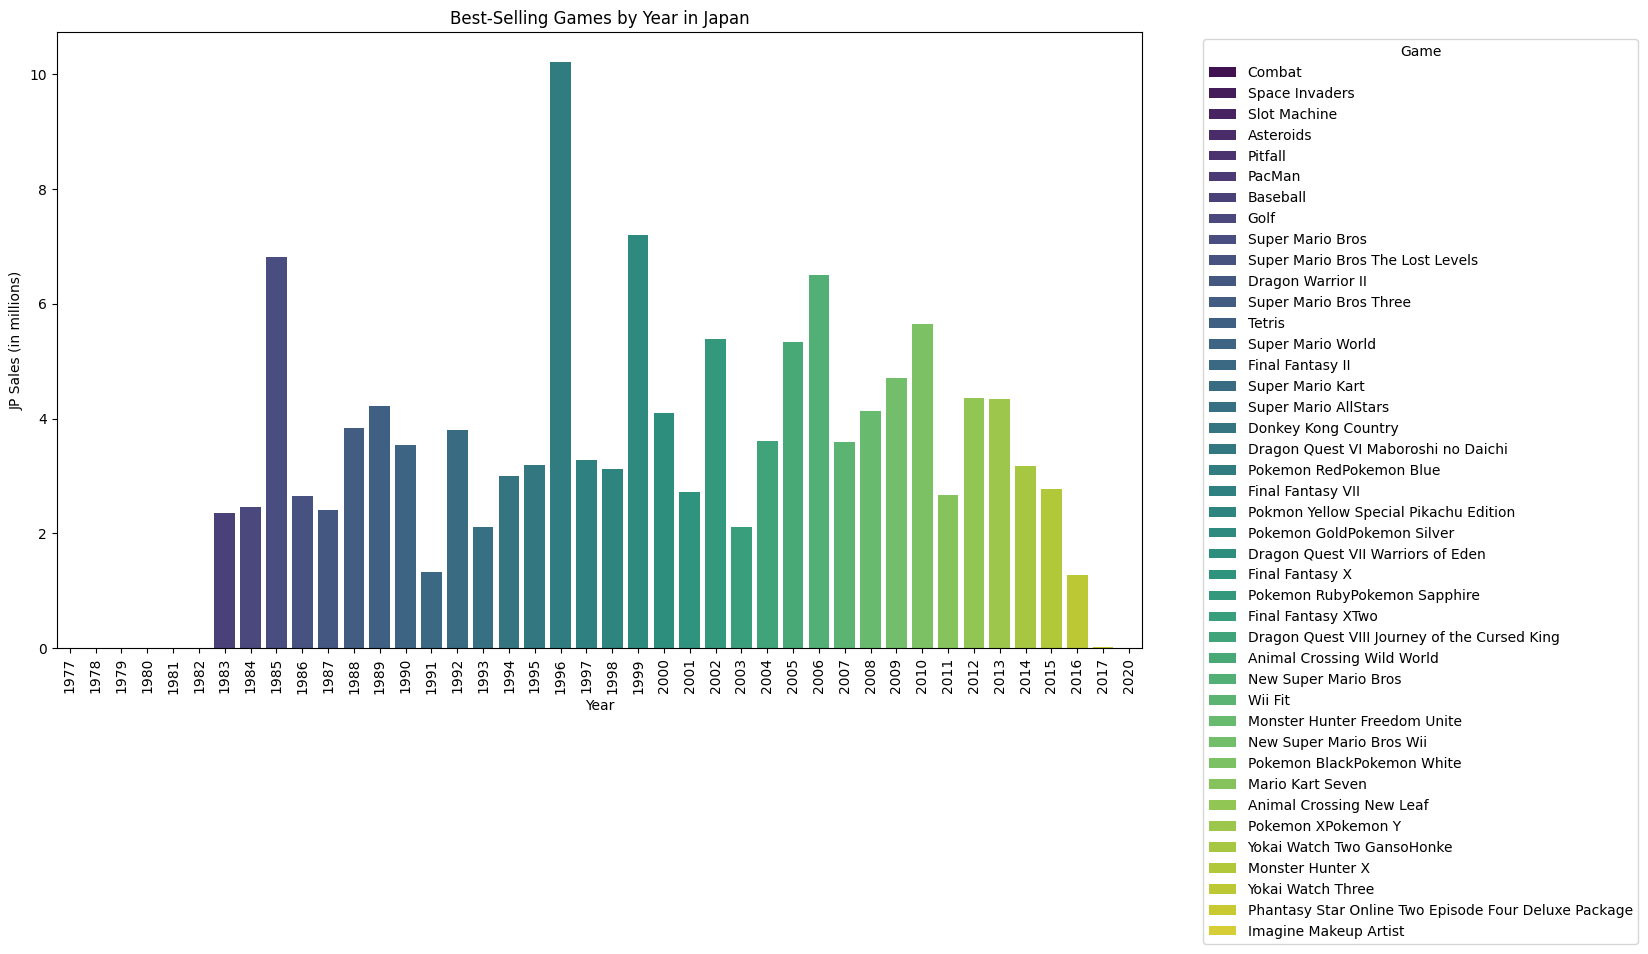


Best-Selling Game in Japan:
Year: 1996, Name: Pokemon RedPokemon Blue, Sales: 10.22


In [184]:
# Best-Selling Games by Year in Japan
plt.figure(figsize=(14, 8))
sns.barplot(x='Year', y='JP_Sales', hue='Name', data=best_jp, palette='viridis')
plt.title('Best-Selling Games by Year in Japan')
plt.xlabel('Year')
plt.ylabel('JP Sales (in millions)')
plt.xticks(rotation=90)
plt.legend(title='Game', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Find the row with the maximum sales value for each region
max_jp = best_jp.loc[best_jp['JP_Sales'].idxmax()]

print("\nBest-Selling Game in Japan:")
print(f"Year: {max_jp['Year']}, Name: {max_jp['Name']}, Sales: {max_jp['JP_Sales']}")

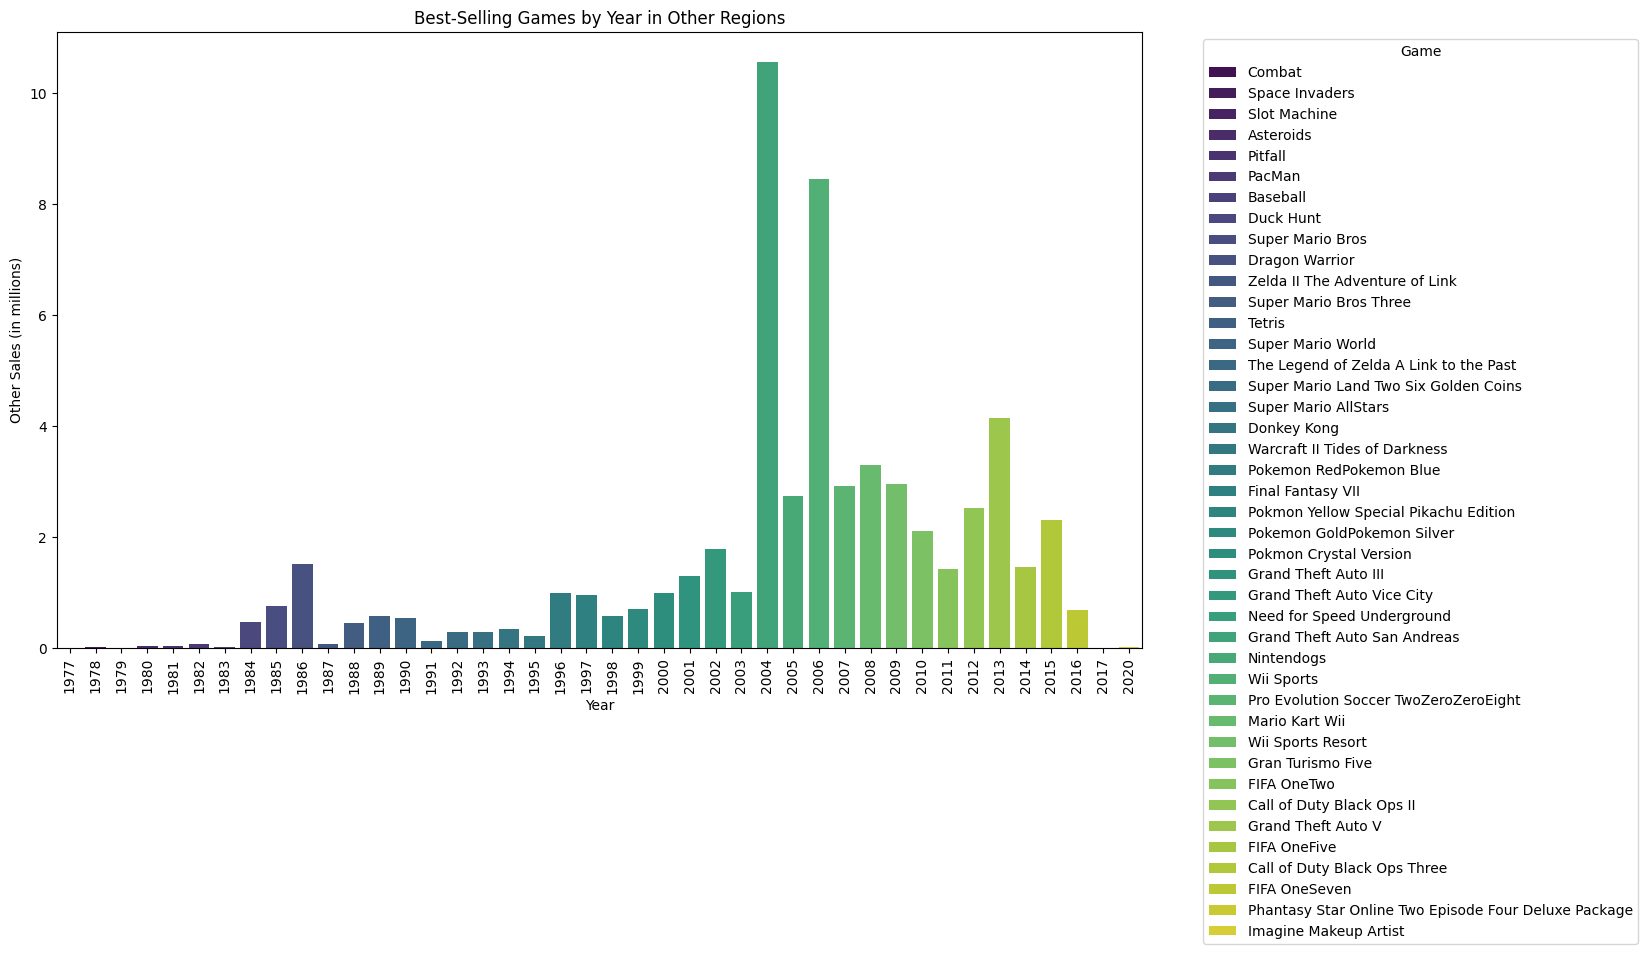


Best-Selling Game in Other Regions:
Year: 2004, Name: Grand Theft Auto San Andreas, Sales: 10.57


In [185]:
# Best-Selling Games by Year in Other Regions
plt.figure(figsize=(14, 8))
sns.barplot(x='Year', y='Other_Sales', hue='Name', data=best_other, palette='viridis')
plt.title('Best-Selling Games by Year in Other Regions')
plt.xlabel('Year')
plt.ylabel('Other Sales (in millions)')
plt.xticks(rotation=90)
plt.legend(title='Game', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Find the row with the maximum sales value for each region
max_other = best_other.loc[best_other['Other_Sales'].idxmax()]

# Print the results
print("\nBest-Selling Game in Other Regions:")
print(f"Year: {max_other['Year']}, Name: {max_other['Name']}, Sales: {max_other['Other_Sales']}")

In [195]:
sales_games_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales_Category,EU_Sales_Category,JP_Sales_Category,Other_Sales_Category,Global_Sales_Category
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,high,high,high,high,high
1,2,Super Mario Bros,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,high,high,high,high,high
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,high,high,high,high,high
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,high,high,high,high,high
4,5,Pokemon RedPokemon Blue,GB,1996,Role Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,high,high,high,high,high


In [194]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


# Define sales thresholds
def sales_category(sales, low_thresh, high_thresh):
    if sales < low_thresh:
        return 'low'
    elif sales < high_thresh:
        return 'medium'
    else:
        return 'high'

# Calculate thresholds for categorization
def calculate_thresholds(sales_data):
    low_thresh = np.percentile(sales_data, 33)
    high_thresh = np.percentile(sales_data, 66)
    return low_thresh, high_thresh

# Apply thresholds to categorize sales
for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']:
    low, high = calculate_thresholds(sales_games_data[region])
    sales_games_data[region + '_Category'] = sales_games_data[region].apply(sales_category, args=(low, high))

# Select features and target for classification
features = ['Platform', 'Year', 'Genre', 'Publisher']
target = 'Global_Sales_Category'

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(sales_games_data[features], sales_games_data[target], test_size=0.2, random_state=42)

# Preprocessing pipeline
categorical_features = ['Platform', 'Genre', 'Publisher']
numeric_features = ['Year']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define models for comparison
models = {
    'SVM': SVC(),
    'DecisionTree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f'Model: {model.__class__.__name__}')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Evaluate each model
for model_name, model in models.items():
    evaluate_model(model, X_train, X_test, y_train, y_test)

# Hyperparameter tuning example for SVM using GridSearchCV
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(Pipeline(steps=[('preprocessor', preprocessor),
                                           ('classifier', SVC())]),
                           param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best parameters for SVM:', grid_search.best_params_)
print('Best cross-validation accuracy:', grid_search.best_score_)

# Final evaluation on the test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print('Test set accuracy with best SVM model:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model: SVC
Accuracy: 0.5806451612903226
              precision    recall  f1-score   support

        high       0.64      0.62      0.63       817
         low       0.67      0.58      0.62       663
      medium       0.48      0.54      0.51       814

    accuracy                           0.58      2294
   macro avg       0.60      0.58      0.59      2294
weighted avg       0.59      0.58      0.58      2294

Model: DecisionTreeClassifier
Accuracy: 0.5239755884917175
              precision    recall  f1-score   support

        high       0.57      0.59      0.58       817
         low       0.55      0.57      0.56       663
      medium       0.45      0.41      0.43       814

    accuracy                           0.52      2294
   macro avg       0.52      0.53      0.52      2294
weighted avg       0.52      0.52      0.52      2294

Model: KNeighborsClassifier
Accuracy: 0.5244115082824761
              precision    recall  f1-score   support

        high       0.54    

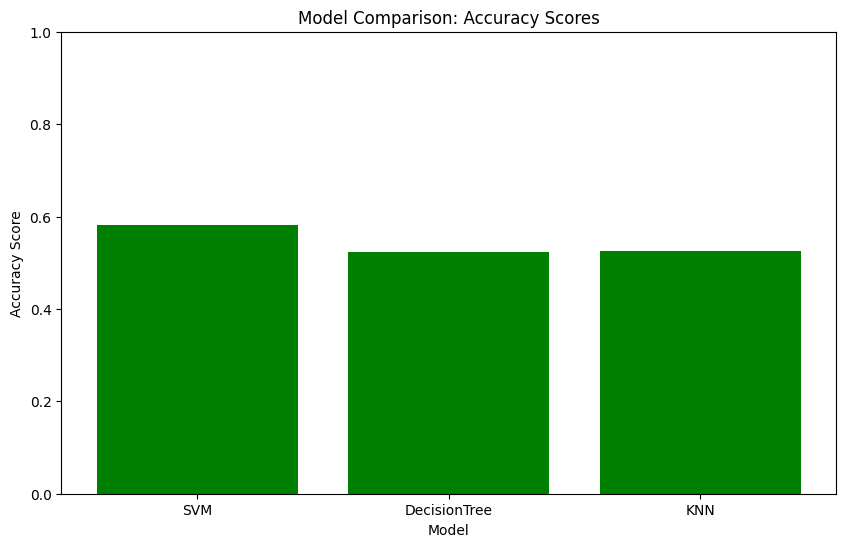

In [208]:
# Define models and their corresponding accuracy scores
models = ['SVM', 'DecisionTree', 'KNN']
accuracy_scores = [0.5806451612903226,  0.5239755884917175, 0.5244115082824761]  # Fill in with your accuracy scores

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color='g')
plt.title('Model Comparison: Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1
plt.show()

**Report**

The analysis used the datasets from Kaggle: "Metacritic All Time Games Stats" and "Cleaned Global Video Game Sales Dataset."

Metacritic is a comprehensive review aggregation website that collects and synthesizes reviews of movies, TV shows, music albums, video games, and books. It provides a metascore, an average score derived from critical reviews of reputable sources. This metascore gives users a quick and easy understanding of the general reception of a particular piece of media. For video games, Metacritic aggregates reviews from various gaming websites, magazines, and critics, offering a broad perspective on a game's quality. In addition to critic reviews, Metacritic allows users to leave their ratings and reviews, providing a dual perspective on the media's reception. The site is widely used by consumers to inform their purchasing decisions and by developers and publishers to gauge the reception of their products.

Since the database contained information only until the end of 2018, it was decided to perform web scraping from the Metacritic website. The result was a database consisting of 14 columns and 27,224 rows. The database included the following columns: name, platform, developer, publisher, genre(s), release_date, critic_positive, critic_neutral, critic_negative, metascore, user_positive, user_neutral, user_negative, and user_score. The database was cleaned, and column types were changed where necessary.

On the graph "Number of Games by Year," we clearly see that most games were released in 2018, but a decline is visible after that. Several reasons could explain this decline. The first is the impact of the COVID-19 pandemic, which began in late 2019 and significantly affected the world throughout 2020 and beyond. Many game releases were postponed due to logistical challenges, production delays, and the need for additional development time. Major gaming events and conferences, where games are typically announced or showcased, such as E3, were canceled or moved to virtual formats, affecting marketing and release schedules.

The second reason is economic factors, market saturation, and strategic releases. Studios, especially smaller ones, faced financial constraints that limited their ability to develop and release new titles. Investors became more cautious, leading to tighter budgets and funding challenges for new projects. With many games being released in previous years, competition for player attention and market share increased.

The third reason is technological transition. The transition to new console generations (e.g., PlayStation 5 and Xbox Series X) also played a role. Developers needed to adjust to new hardware capabilities and optimize their games for next-gen consoles, which could cause delays and reduced release schedules. Creating games that work seamlessly across different generations and platforms required additional time and resources.

As we can see on the other plot, "Number of Games Released per Month," there is a significant rise in September, October, and November. Several factors could explain this. First, the holiday season. Black Friday and Cyber Monday, major shopping events occurring in late November, prompt many consumers to start their holiday shopping around this time. Releasing games in October and November positions them well for these sales spikes. Christmas and the holiday season also see many people purchasing games as gifts. Releasing games in these months ensures they are fresh in consumers' minds and available for holiday shopping.

Conversely, we see the lowest releases in December and January, likely related to the holidays when programmers and most game company staff take vacations, making these months less convenient for releases. The same trend is observed during the summer months.

Our analysis shows that the most popular genre for game releases is Action. Ubisoft is the most prolific publisher, and Capcom is the top developer. Regarding platforms, most games are released for the PC, but considering console versions, the PlayStation brand is the most popular for releases.

Over the years, the game with the highest number of positive critic reviews is "Halo Infinite," and the game with the most positive user reviews is "Cyberpunk 2077."

Examining the "Yearly Metascore by Genres" plot, we see a clear growth trend in action games from 2000 to 2018, but by 2019, other genres prevail, and action games decline. This shift could be due to changing player preferences. There has been a growing demand for games with rich narratives and storylines, leading to the rise of genres like role-playing games (RPGs) and adventure games. The increasing popularity of indie games, which often explore unique and diverse genres, has introduced players to new experiences beyond traditional action games.

Games emphasizing social interaction and cooperative gameplay, such as multiplayer online battle arena (MOBA) games and co-op survival games, have gained traction. The massive success of battle royale games and other multiplayer-centric titles has significantly impacted genre trends. Games like Fortnite, PUBG, and Apex Legends have popularized the battle royale genre, drawing players away from traditional action games. The focus on multiplayer and live-service games has shifted the industry's attention towards genres supporting these formats, including first-person shooters (FPS), survival games, and MOBAs.

Innovations and experimentation in game design have led to the emergence of new and hybrid genres. Developers are blending elements from various genres to create unique gaming experiences, such as action-adventure RPGs and strategy-survival hybrids. There is also a growing interest in simulation games and immersive experiences, leading to the popularity of genres like life simulation, strategy, and sandbox games. There is a growing demand for games featuring diverse characters and inclusive storytelling, often found in genres like RPGs, adventure, and narrative-driven games. Increased awareness of mental health has led to a preference for games offering relaxing and stress-relieving experiences, such as simulation and puzzle games.


Concerning the sales dataset, we have the following columns: Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, and Global_Sales. We cleaned and supplemented the database with the necessary data.

From the analysis, we can see that there is a significant gap between sales in North America and other regions. Looking at the number of games released each year, there is a significant difference between the data in the previous database. This discrepancy could be due to two main reasons. First, the sales database only goes up to 2020, and we see a drop in data starting from 2017. Second, not all platforms on which games were released are represented in the sales database. However, it is clear that the major genre remains action games.

Globally, we can see a significant rise in the sales of action games in 1984, 1985, and from 1988 to 1990. We can suggest a few reasons for this trend. The mid-1980s saw the introduction and popularization of more advanced home gaming consoles. There were significant innovations in game design, including better game mechanics, more complex levels, and more engaging stories, making action games more enjoyable and replayable. The Nintendo Entertainment System (NES), released in 1985 in North America, revolutionized the home gaming market with better graphics, sound, and gameplay mechanics compared to previous systems. There was also significant advancement in arcade game technology, pushing the boundaries of what action games could achieve in terms of graphics, speed, and interactivity. Several groundbreaking action games were released during this period, setting new standards and becoming extremely popular. Notable titles include "Super Mario Bros." (1985), which defined the platforming sub-genre of action games, and "The Legend of Zelda" (1986), which introduced adventure elements to the action genre. Many successful franchises that continue to be popular today were established during this time, including "Mega Man" (1987) and "Metroid" (1986).

The best-selling games were made for the PlayStation 2 console, and Nintendo had the largest global game sales for the entire period in 2006. If we look at sales by region, the best-selling game in North America and Europe was Wii Sports in 2006. In Japan, it was Pokemon Red/Pokemon Blue in 1996, and for other regions, it was Grand Theft Auto: San Andreas in 2004.

We created classification models to determine which is better at predicting game categories based on their sales figures. The best-performing model is the SVC with an accuracy of 0.5806 and the best cross-validation accuracy of 0.5603. The SVC model had the highest accuracy and balanced precision, recall, and f1-scores across categories. Decision Tree and KNN models showed lower accuracy and less balanced metrics compared to the SVC. The SVC model performed particularly well in predicting 'high' and 'low' sales categories but had lower performance for 'medium' sales.

These findings can assist game developers and publishers in predicting the potential sales success of upcoming games based on their genre, platform, and publisher. The insights gained can inform strategic decisions regarding game development, marketing efforts, and release timing to maximize sales potential.